### Cài đặt

In [ ]:
## Tải thư viện
!pip install pycountry_convert
!pip install country-converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 24.0 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=83c79d9fa213d1cf360fdcc9106505d9c024ba996bba20b2311b80981f6946b1
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
## CÀI ĐẶT THƯ VIỆN

# Xử lý dữ liệu
import pandas as pd
import numpy as np
import country_converter as coco
import pycountry_convert as pc

# Trực quan hóa
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import plotly.express as px
import pandas as pd

# Khác
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## ĐỌC FILE
import pandas as pd
url = 'https://github.com/dangdailoi/Data_Visualization/raw/f54ffe7765ab9fafb808fedff3ffeab34ea005d9/2017.csv'
df = pd.read_csv(url)

df.tail()

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005

# 1. TỔNG QUAN & TIỀN XỬ LÝ
**Mô tả dữ liệu**
- Country: Tên quốc gia
- Happiness.Rank: Xếp hạng hạnh phúc của quốc gia, với quốc gia hạnh phúc nhất được xếp hạng 1
- Happiness.Score: Điểm số hạnh phúc của quốc gia, được tính toán dựa trên các câu hỏi đánh giá cuộc sống trong cuộc khảo sát.
- Whisker.High - Whisker.Low: Các giá trị này tạo thành khoảng tin cậy 95% cho điểm số hạnh phúc
- Economy..GDP.per.Capita.:  Sản lượng quốc nội trên đầu người, một đại diện cho mức độ sản xuất kinh tế của một quốc gia.
- Family: Đánh giá về hỗ trợ xã hội
- Health..Life.Expectancy.: Tuổi thọ trung bình
- Freedom: Mức độ tự do cá nhân của mỗi quốc gia
- Generosity: Sự rộng lượng, thường được đo lường bằng tỷ lệ quyên góp
- Trust: Mức độ tin tưởng và sự nhận thức về tham nhũng trong chính phủ
- Dystopia.Residual: Dystopia là một quốc gia giả tưởng có các giá trị thấp nhất trên thế giới cho mỗi trong sáu yếu tố - sản xuất kinh tế, hỗ trợ xã hội, tuổi thọ, tự do, không có tham nhũng và lòng rộng lượng => Điểm số Dystopia Residual là điểm số mà mỗi quốc gia phải vượt qua để có điểm số hạnh phúc cao hơn Dystopia

## Tổng quan bộ dữ liệu

In [ ]:
## THAY ĐỔI TÊN CÁC CỘT
df = df.rename(columns = {'Happiness.Rank' : 'Rank',
                        'Happiness.Score' : 'Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life Expectancy',
                        'Trust..Government.Corruption.' : 'Trust',
                        'Dystopia.Residual' : 'Dystopia'})
df.columns

Index(['Country', 'Rank', 'Score', 'Whisker.high', 'Whisker.low', 'GDP',
       'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust',
       'Dystopia'],
      dtype='object')

In [ ]:
print(f'Dataset có {df.shape[0]} hàng và {df.shape[1]} cột\n')
df.info()

Dataset có 155 hàng và 12 cột

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          155 non-null    object 
 1   Rank             155 non-null    int64  
 2   Score            155 non-null    float64
 3   Whisker.high     155 non-null    float64
 4   Whisker.low      155 non-null    float64
 5   GDP              155 non-null    float64
 6   Family           155 non-null    float64
 7   Life Expectancy  155 non-null    float64
 8   Freedom          155 non-null    float64
 9   Generosity       155 non-null    float64
 10  Trust            155 non-null    float64
 11  Dystopia         155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


## Tiền xử lý dữ liệu

In [ ]:
df.tail(20)

Country  Rank  Score  Whisker.high  Whisker.low  \
135                    Malawi   136  3.970      4.077479     3.862521   
136                      Chad   137  3.936      4.034712     3.837289   
137                  Zimbabwe   138  3.875      3.978700     3.771300   
138                   Lesotho   139  3.808      4.044344     3.571656   
139                    Angola   140  3.795      3.951642     3.638358   
140               Afghanistan   141  3.794      3.873661     3.714338   
141                  Botswana   142  3.766      3.874123     3.657877   
142                     Benin   143  3.657      3.745784     3.568217   
143                Madagascar   144  3.644      3.714319     3.573681   
144                     Haiti   145  3.603      3.734715     3.471285   
145                     Yemen   146  3.593      3.692750     3.493250   
146               South Sudan   147  3.591      3.725539     3.456462   
147                   Liberia   148  3.533      3.653756     3.412244   
148                    Guinea   149  3.507      3.584428     3.429572   
149                      Togo   150  3.495      3.594038     3.395962   
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570   
153                   Burundi   154  2.905      3.074690     2.735310   
154  Central African Republic   155  2.693      2.864884     2.521116   

          GDP    Family  Life Expectancy   Freedom  Generosity     Trust  \
135  0.233442  0.512569         0.315090  0.466915    0.287170  0.072712   
136  0.438013  0.953856         0.041135  0.162342    0.216114  0.053582   
137  0.375847  1.083096         0.196764  0.336384    0.189143  0.095375   
138  0.521021  1.190095         0.000000  0.390661    0.157497  0.119095   
139  0.858428  1.104412         0.049869  0.000000    0.097926  0.069720   
140  0.401477  0.581543         0.180747  0.106180    0.311871  0.061158   
141  1.122094  1.221555         0.341756  0.505196    0.099348  0.098583   
142  0.431085  0.435300         0.209930  0.425963    0.207948  0.060929   
143  0.305809  0.913020         0.375223  0.189197    0.208733  0.067232   
144  0.368610  0.640450         0.277321  0.030370    0.489204  0.099872   
145  0.591683  0.935382         0.310081  0.249464    0.104125  0.056767   
146  0.397249  0.601323         0.163486  0.147062    0.285671  0.116794   
147  0.119042  0.872118         0.229918  0.332881    0.266550  0.038948   
148  0.244550  0.791245         0.194129  0.348588    0.264815  0.110938   
149  0.305445  0.431883         0.247106  0.380426    0.196896  0.095665   
150  0.368746  0.945707         0.326425  0.581844    0.252756  0.455220   
151  0.777153  0.396103         0.500533  0.081539    0.493664  0.151347   
152  0.511136  1.041990         0.364509  0.390018    0.354256  0.066035   
153  0.091623  0.629794         0.151611  0.059901    0.204435  0.084148   
154  0.000000  0.000000         0.018773  0.270842    0.280876  0.056565   

     Dystopia  
135  2.081786  
136  2.071238  
137  1.597970  
138  1.429835  
139  1.614482  
140  2.150801  
141  0.377914  
142  1.885631  
143  1.584613  
144  1.697168  
145  1.345601  
146  1.879567  
147  1.673286  
148  1.552312  
149  1.837229  
150  0.540061  
151  1.061574  
152  0.621130  
153  1.683024  
154  2.066005

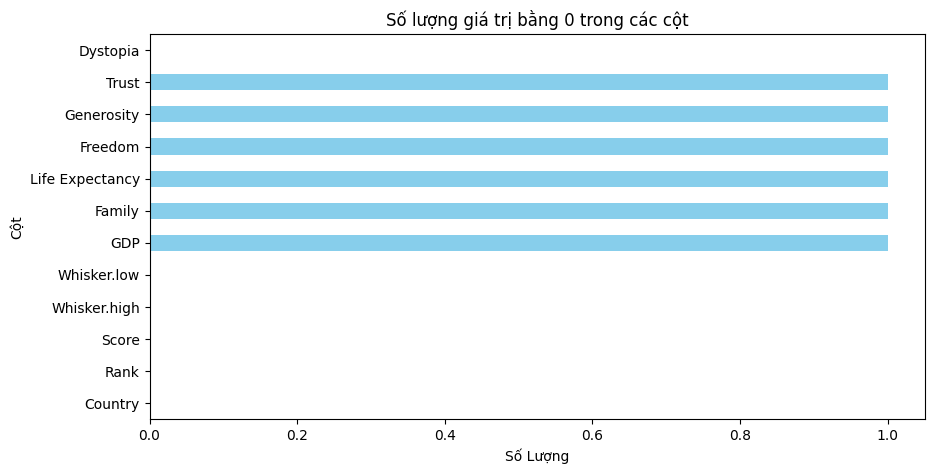

In [ ]:
# Kiểm tra có giá trị 0 điền vào thay thế cho NaN không
zero_counts = (df == 0).sum()
# Vẽ biểu đồ histogram với trục x và y đảo ngược
plt.figure(figsize=(10, 5))
zero_counts.plot(kind='barh', color='skyblue')  # Sử dụng barh thay vì bar
plt.title('Số lượng giá trị bằng 0 trong các cột')
plt.xlabel('Số Lượng')
plt.ylabel('Cột')
plt.show()

In [ ]:
# THAY THẾ GIÁ TRỊ 0 bằng GIÁ TRỊ GẦN ĐÓ:
if (df == 0).any().any():
    df.replace(0, np.nan, inplace=True)
    df.interpolate(method='linear', inplace=True)

df.tail()

Country  Rank  Score  Whisker.high  Whisker.low  \
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570   
153                   Burundi   154  2.905      3.074690     2.735310   
154  Central African Republic   155  2.693      2.864884     2.521116   

          GDP    Family  Life Expectancy   Freedom  Generosity     Trust  \
150  0.368746  0.945707         0.326425  0.581844    0.252756  0.455220   
151  0.777153  0.396103         0.500533  0.081539    0.493664  0.151347   
152  0.511136  1.041990         0.364509  0.390018    0.354256  0.066035   
153  0.091623  0.629794         0.151611  0.059901    0.204435  0.084148   
154  0.091623  0.629794         0.018773  0.270842    0.280876  0.056565   

     Dystopia  
150  0.540061  
151  1.061574  
152  0.621130  
153  1.683024  
154  2.066005

In [ ]:
## KIỂM TRA CÁC HÀNG TRÙNG LẶP
print('Kiểm tra các dòng trùng lặp: ')
df.duplicated().sum()

Kiểm tra các dòng trùng lặp: 


0

In [ ]:
## KIỂM TRA CÓ OUTLIERS KHÔNG (theo quy tắc 3-sigma)
def check_outliers(column):
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    outliers = [x for x in column if x > upper_limit or x < lower_limit]
    return outliers

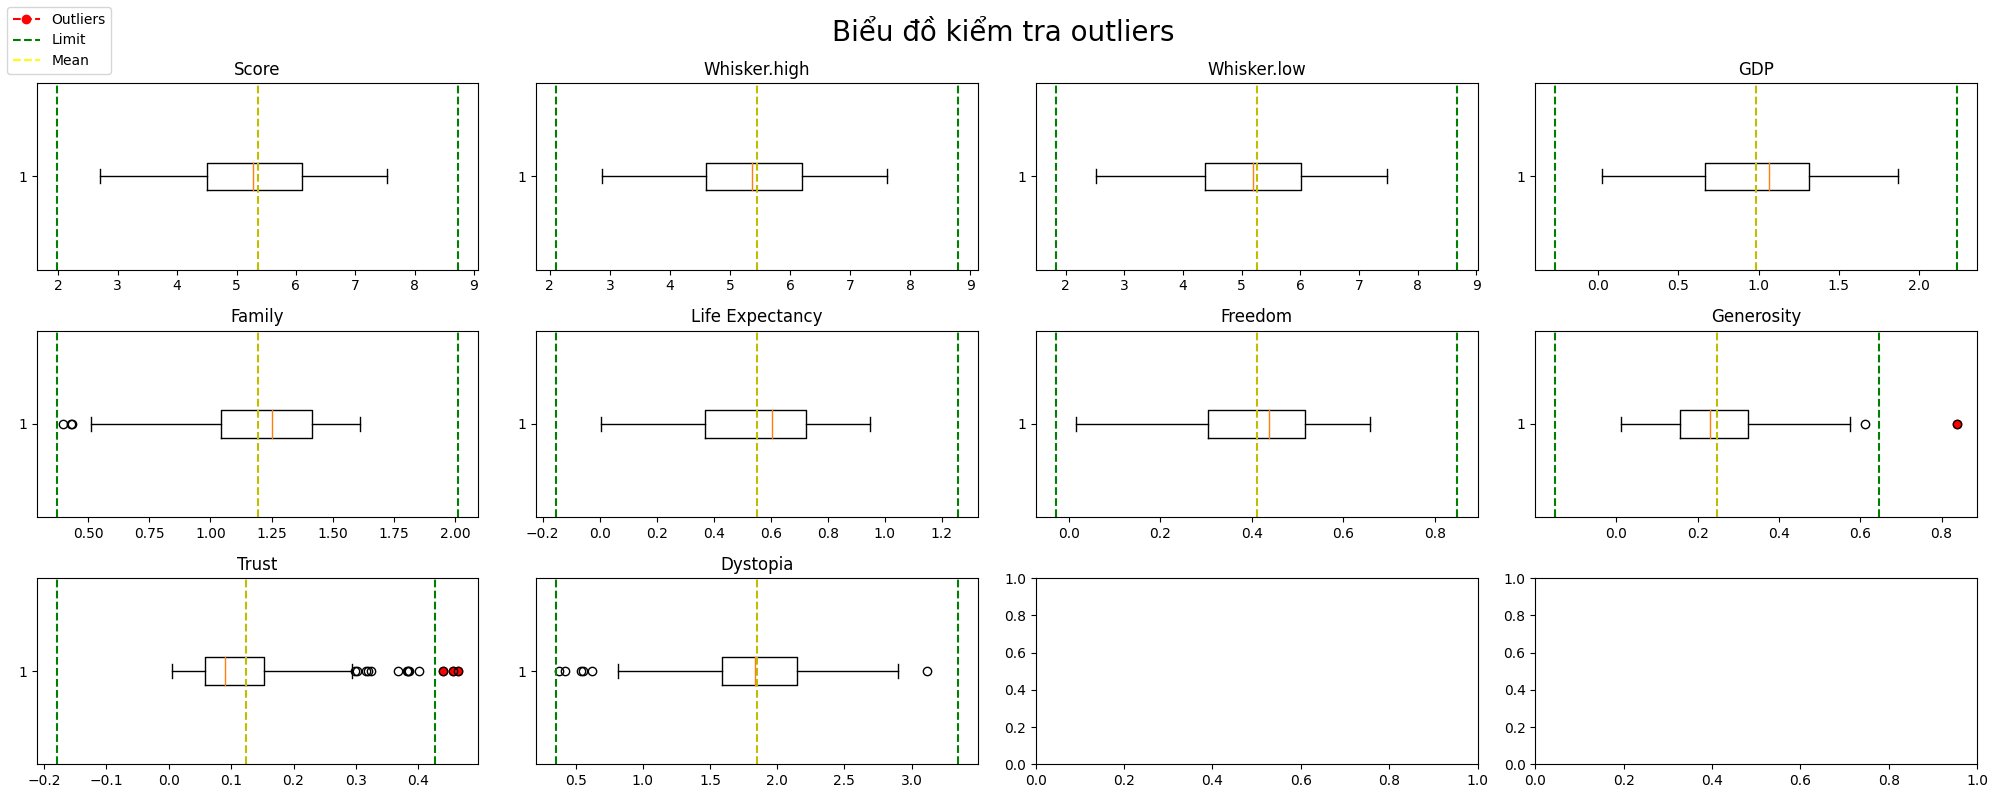

In [ ]:
def draw_outliers(column, ax):
    ax.boxplot(column, vert=False)
    # Check outlier và đánh dấu
    outliers = check_outliers(column)
    if len(outliers) > 0:
        ax.scatter(outliers, [1] * len(outliers), c='r', marker='o', label='Outliers')
    mean = np.mean(column)
    std = np.std(column)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    # Vẽ đường với các màu cụ thể
    ax.axvline(mean, color='y', linestyle='--')
    ax.axvline(lower_limit, color='g', linestyle='--')
    ax.axvline(upper_limit, color='g', linestyle='--')


#Vẽ biểu đồ
fig, axs = plt.subplots(3, 4, figsize=(20, 8))
fig.suptitle('Biểu đồ kiểm tra outliers', fontsize=20)
include = ['Score', 'Whisker.high', 'Whisker.low', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust', 'Dystopia']
for i, col in enumerate(df[include].columns):
    draw_outliers(df[col], axs[i//4, i%4])
    axs[i//4, i%4].set_title(col)

# Tạo chú thích cho tổng thể
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='--', label='Outliers')
green_line = mlines.Line2D([], [], color='green', linestyle='--', label='Limit')
yellow_line = mlines.Line2D([], [], color='yellow', linestyle='--', label='Mean')
fig.legend(handles=[red_dot, green_line, yellow_line], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# In chi tiết vị trí của outlier
for col in df[include].columns:
    outliers = check_outliers(df[col])
    if len(outliers) > 0:
        for outlier in outliers:
            idx = df[df[col] == outlier].index.tolist()
            idxplus = [i for i in idx]
            print(f'Dòng {idxplus} cột "{col}" có outlier là: {outlier}')

selected_rows = df.iloc[[113, 25, 34, 150]]
selected_rows.head()

Dòng [154] cột "Family" có outlier là: 0.0
Dòng [113] cột "Generosity" có outlier là: 0.838075160980225
Dòng [25] cột "Trust" có outlier là: 0.46430778503418
Dòng [34] cột "Trust" có outlier là: 0.439299255609512
Dòng [150] cột "Trust" có outlier là: 0.455220013856888


Country  Rank  Score  Whisker.high  Whisker.low       GDP    Family  \
113    Myanmar   114  4.545      4.614740     4.475260  0.367111  1.123236   
25   Singapore    26  6.572      6.636723     6.507277  1.692278  1.353814   
34       Qatar    35  6.375      6.568477     6.181523  1.870766  1.274297   
150     Rwanda   151  3.471      3.543030     3.398970  0.368746  0.945707   

     Life Expectancy   Freedom  Generosity     Trust  Dystopia  
113         0.397523  0.514492    0.838075  0.188816  1.115290  
25          0.949492  0.549841    0.345966  0.464308  1.216362  
34          0.710098  0.604131    0.330474  0.439299  1.145464  
150         0.326425  0.581844    0.252756  0.455220  0.540061

In [ ]:
## THAY THẾ OUTLIERS BẰNG GIÁ TRỊ GẦN ĐÓ
def replace_outliers(df, id, col):
    df.loc[id, col] = np.nan
    df.interpolate(method='linear', inplace=True)

# Sử dụng hàm
replace_outliers(df, 113, 'Generosity')
replace_outliers(df, 150, 'Trust')

In [ ]:
# Thêm cột Tier dựa trên 4 điểm tứ phân vị (chia thành 4 phần chiếm 25% dữ liệu)
df['Tier'] = pd.qcut(df['Score'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Low-Mid', 'Top-Mid', 'Top'])

# Đếm số lượng giá trị trong cột Tier
print(df['Tier'].value_counts())


Low        39
Low-Mid    39
Top        39
Top-Mid    38
Name: Tier, dtype: int64


In [ ]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [ ]:
import pandas as pd
import country_converter as coco
import pycountry_convert as pc


cc = coco.CountryConverter()

# Create a list of country names for the dataframe
cont_list=[]
for arow in df['Country']:
    country = []
    arowarr = arow.split(", ")
    for aname in arowarr:
        country.append(aname)

    #print(f'org:{arow} split:{country}')
    # Converting country names to ISO 3
    iso_alpha = cc.convert(names = country, to='ISO3')
    #print(f'iso_alpha:{iso_alpha} type:{type(iso_alpha)}')

    # converting to continents
    continent=[]
    if (type(iso_alpha) == type("")):
        try:
            #print(f'   iso_alpha:{iso_alpha}')
            continent.append(country_to_continent(iso_alpha))
        except:
            continent.append('other')
    else:
        for iso in iso_alpha:
            try:
                #print(f'   iso:{iso}')
                continent.append(country_to_continent(iso))
            except:
                continent.append('other')

    # convert array back to string
    str_cont = ', '.join(continent)
    #print(f'str_cont:{str_cont}')
    cont_list.append(str_cont)

# add continents to original dataframe
df['Continent']=cont_list

In [ ]:
##Có 1 giá trị 'Asia, Asia' --> Replace giá trị bằng 'Asia'

df['Continent'].replace('Asia, Asia', 'Asia', inplace = True)



In [ ]:
df[df['Continent']=='other']
### Có tranh chấp --> bỏ

Country  Rank  Score  Whisker.high  Whisker.low       GDP    Family  \
77  Kosovo    78  5.279      5.364848     5.193152  0.951484  1.137854   

    Life Expectancy   Freedom  Generosity     Trust  Dystopia     Tier  \
77         0.541452  0.260288    0.319931  0.057472  2.010541  Low-Mid   

   Continent  
77     other

In [ ]:
df = df.drop(df[df['Continent'] == 'other'].index)

# 2. THỐNG KÊ MÔ TẢ


array([[<Axes: title={'center': 'Rank'}>,
        <Axes: title={'center': 'Score'}>,
        <Axes: title={'center': 'Whisker.high'}>],
       [<Axes: title={'center': 'Whisker.low'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Family'}>],
       [<Axes: title={'center': 'Life Expectancy'}>,
        <Axes: title={'center': 'Freedom'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Trust'}>,
        <Axes: title={'center': 'Dystopia'}>, <Axes: >]], dtype=object)

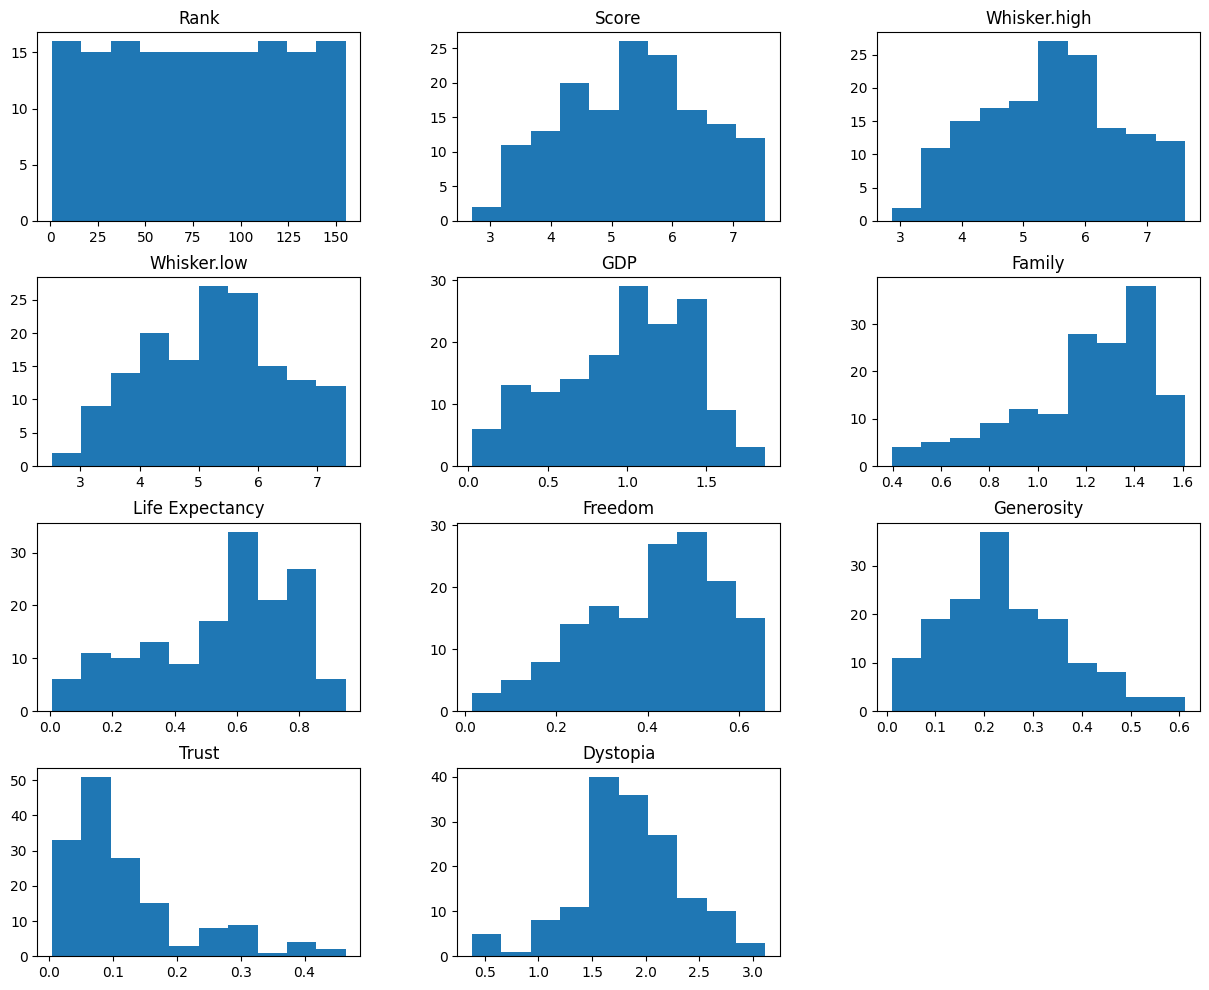

In [ ]:
df.hist(figsize = (15,12), grid = False) #space

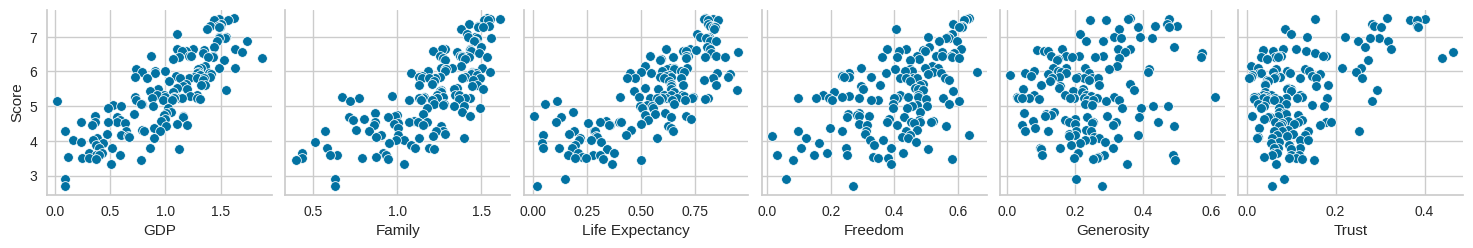

In [ ]:
### Mối liên hệ của Score so với từng biến

cols = ['Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust']
df_column = df[cols]
sns.pairplot(df_column
             , x_vars = ['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust']
             , y_vars = ['Score']
             )
plt.show()

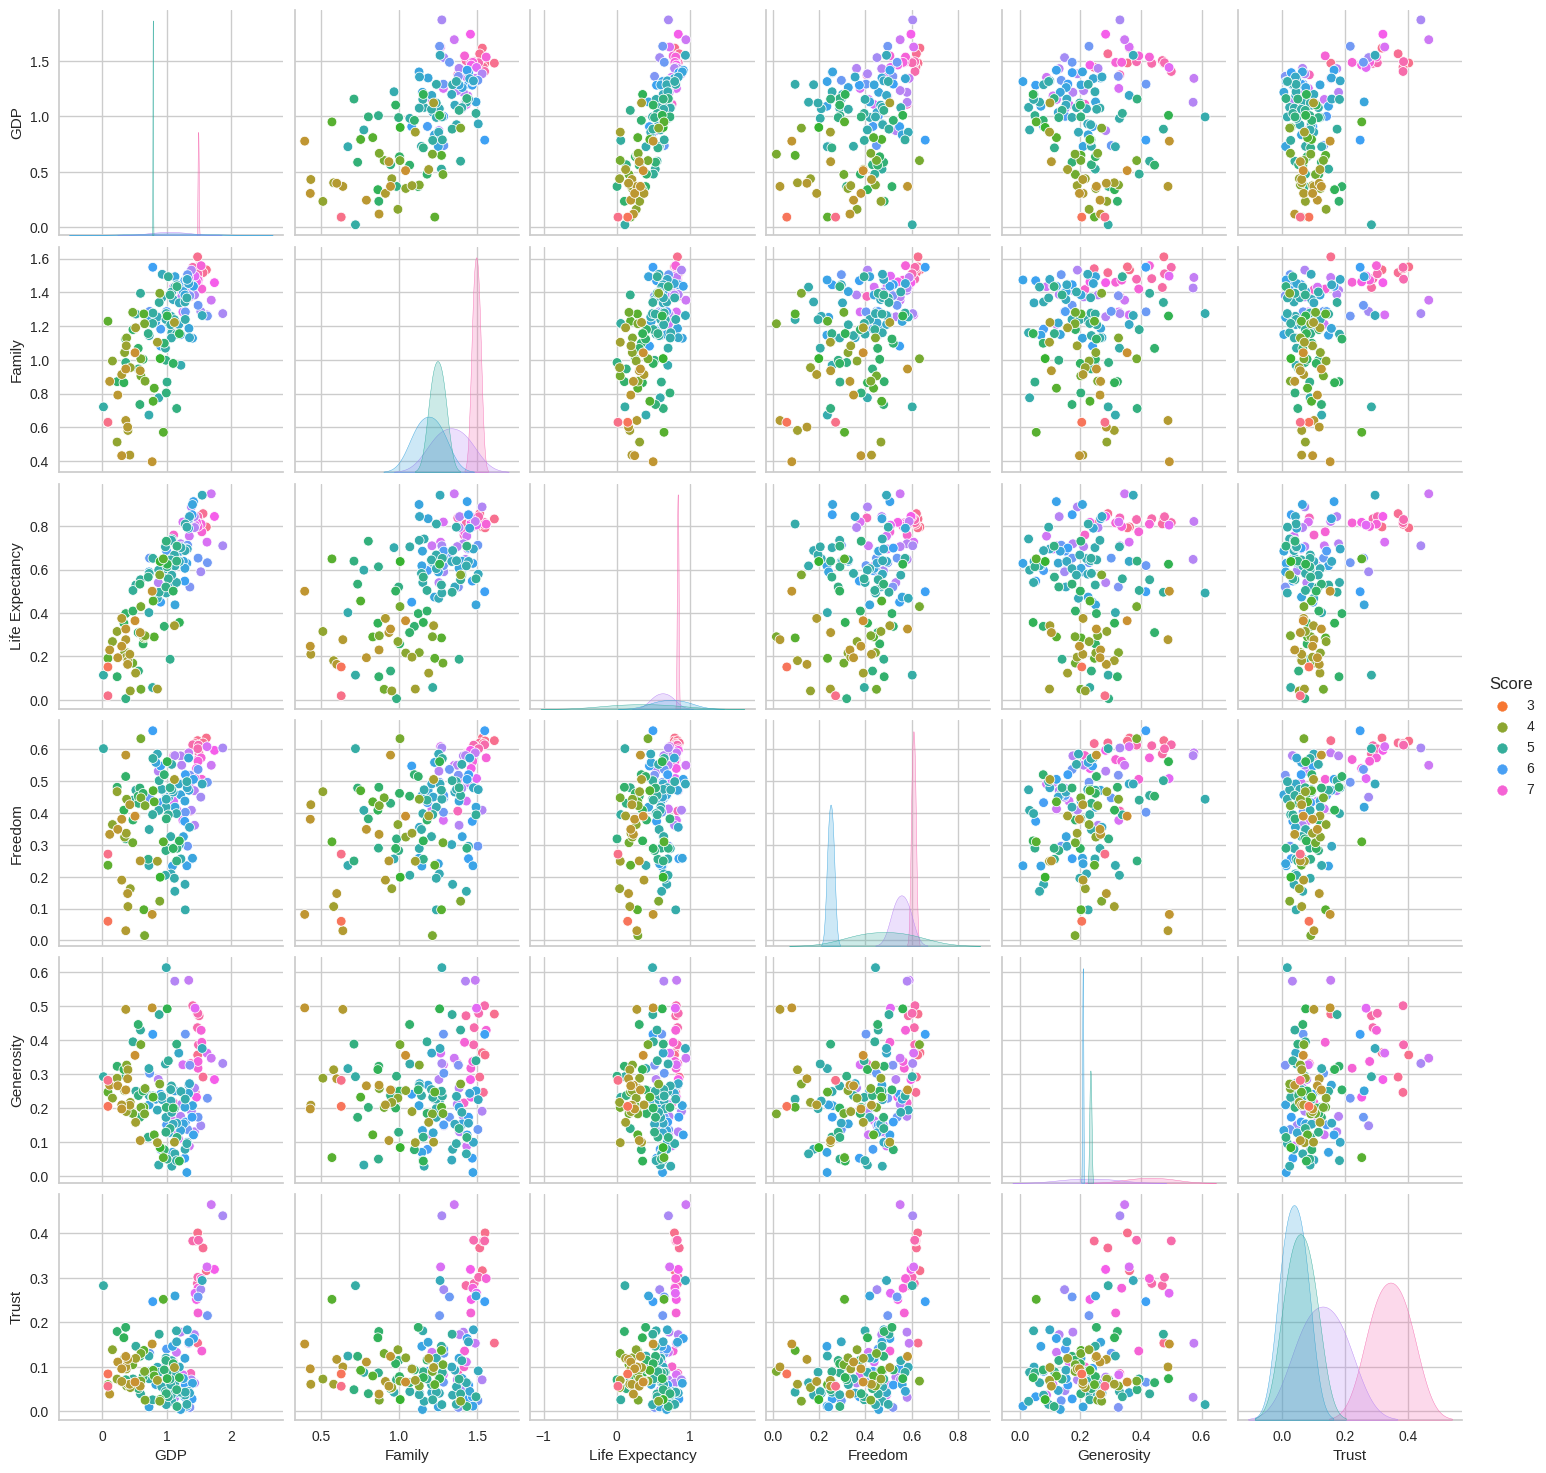

In [ ]:
### Mối liên hệ giữa 2 cặp thuộc tính theo Score
cols = ['Score','GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust']
df_column = df[cols]
sns.pairplot(df_column, hue ='Score', palette= 'husl')
plt.show()

In [ ]:
column_correlation = df.drop(['Country'], axis =1)
correl_matrix = column_correlation.corr()
correl_matrix

Rank     Score  Whisker.high  Whisker.low       GDP  \
Rank             1.000000 -0.992789     -0.993078    -0.991543 -0.813407   
Score           -0.992789  1.000000      0.999498     0.999521  0.811702   
Whisker.high    -0.993078  0.999498      1.000000     0.998038  0.811153   
Whisker.low     -0.991543  0.999521      0.998038     1.000000  0.811452   
GDP             -0.813407  0.811702      0.811153     0.811452  1.000000   
Family          -0.745528  0.752690      0.751375     0.753245  0.684676   
Life Expectancy -0.781608  0.782816      0.777831     0.786928  0.844744   
Freedom         -0.549965  0.568548      0.568638     0.567908  0.374977   
Generosity      -0.165900  0.189088      0.190372     0.187650  0.033625   
Trust           -0.457716  0.482826      0.480968     0.484173  0.397726   
Dystopia        -0.484669  0.475661      0.479158     0.471783  0.025093   
CI Width         0.324501 -0.350324     -0.320469    -0.379147 -0.288549   

                   Family  Life Expectancy   Freedom  Generosity     Trust  \
Rank            -0.745528        -0.781608 -0.549965   -0.165900 -0.457716   
Score            0.752690         0.782816  0.568548    0.189088  0.482826   
Whisker.high     0.751375         0.777831  0.568638    0.190372  0.480968   
Whisker.low      0.753245         0.786928  0.567908    0.187650  0.484173   
GDP              0.684676         0.844744  0.374977    0.033625  0.397726   
Family           1.000000         0.611326  0.436777    0.073271  0.260205   
Life Expectancy  0.611326         1.000000  0.336733    0.099709  0.316130   
Freedom          0.436777         0.336733  1.000000    0.294842  0.492200   
Generosity       0.073271         0.099709  0.294842    1.000000  0.304981   
Trust            0.260205         0.316130  0.492200    0.304981  1.000000   
Dystopia         0.080669         0.052604  0.080923   -0.085176  0.035747   
CI Width        -0.291393        -0.409999 -0.188063   -0.025466 -0.216901   

                 Dystopia  CI Width  
Rank            -0.484669  0.324501  
Score            0.475661 -0.350324  
Whisker.high     0.479158 -0.320469  
Whisker.low      0.471783 -0.379147  
GDP              0.025093 -0.288549  
Family           0.080669 -0.291393  
Life Expectancy  0.052604 -0.409999  
Freedom          0.080923 -0.188063  
Generosity      -0.085176 -0.025466  
Trust            0.035747 -0.216901  
Dystopia         1.000000 -0.056196  
CI Width        -0.056196  1.000000

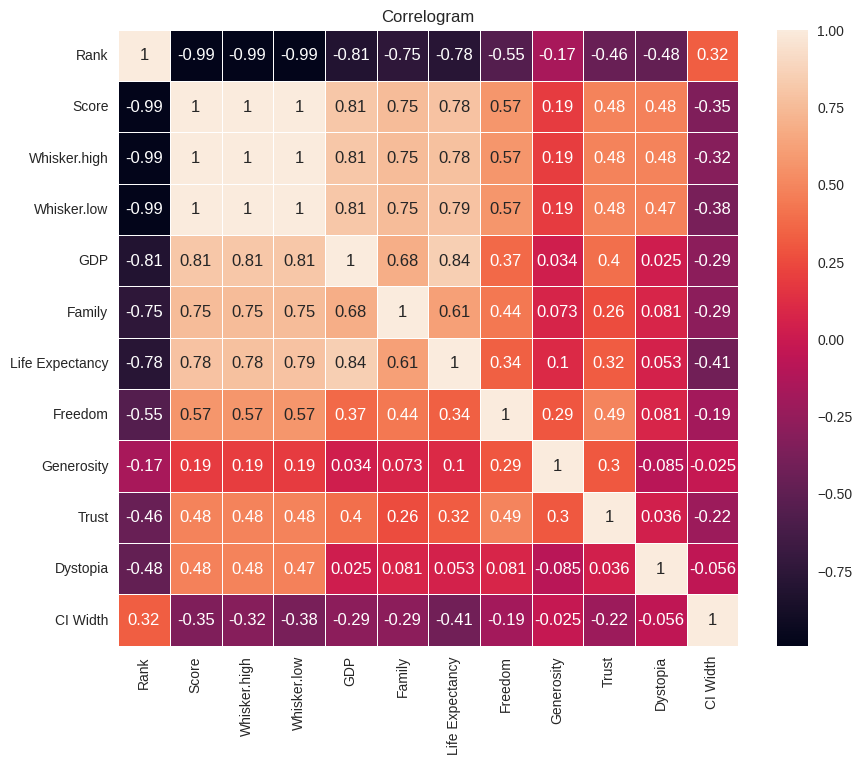

In [ ]:
## Visualize correlogram
plt.figure(figsize=(10, 8))
sns.heatmap(correl_matrix, annot=True, linewidths=.5)
plt.title('Correlogram')
plt.show()

In [ ]:
group_df = df.groupby(['Tier']).mean()
non_index = group_df.reset_index()
non_index

Tier   Rank     Score  Whisker.high  Whisker.low       GDP    Family  \
0      Low  136.0  3.902128      4.013617     3.790639  0.543410  0.914783   
1  Low-Mid   97.5  4.945368      5.045551     4.845186  0.830887  1.118988   
2  Top-Mid   58.5  5.749447      5.848240     5.650655  1.157368  1.315021   
3      Top   20.0  6.820718      6.903859     6.737577  1.410892  1.425698   

   Life Expectancy   Freedom  Generosity     Trust  Dystopia  CI Width  
0         0.294243  0.310252    0.236904  0.090412  1.531606  0.222979  
1         0.495466  0.387160    0.234065  0.085852  1.784586  0.200365  
2         0.656933  0.409455    0.193184  0.098060  1.919461  0.197585  
3         0.763412  0.537917    0.310583  0.210881  2.161280  0.166283

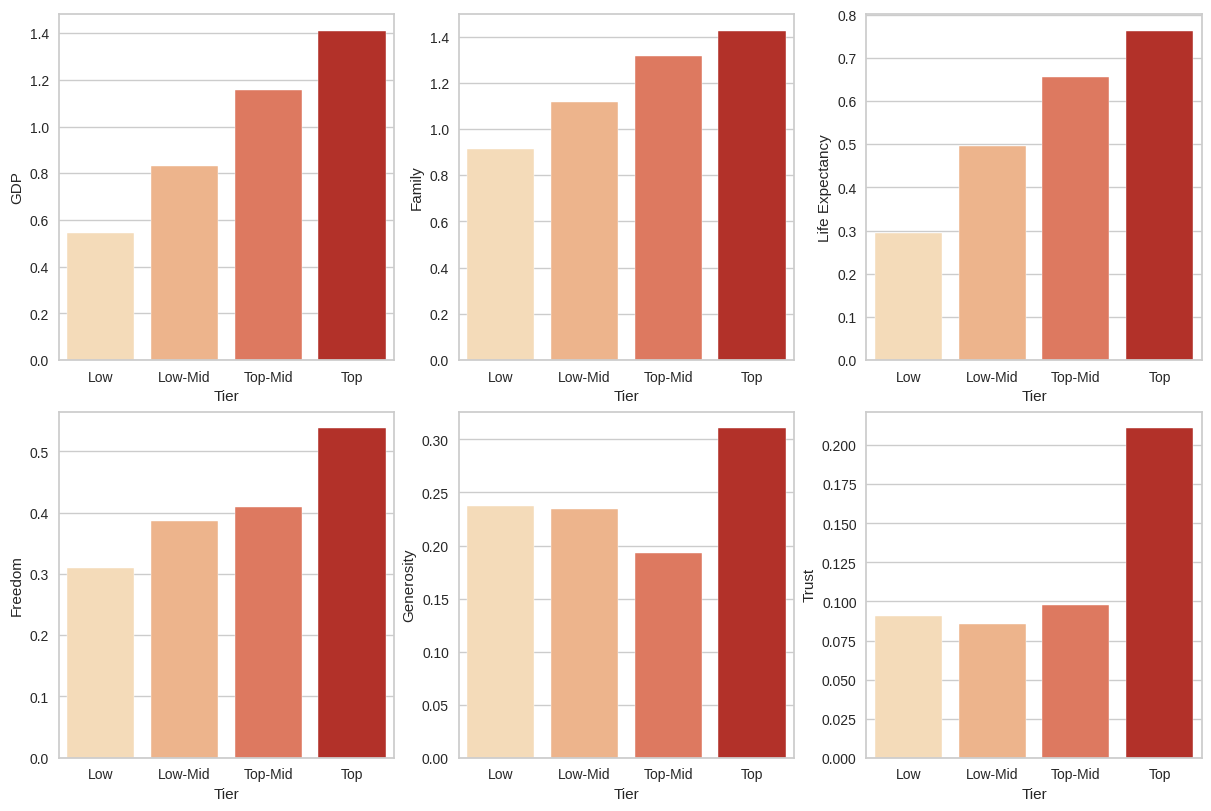

In [ ]:
# Add a new column 'Tier' based on quartiles
df['Tier'] = pd.qcut(df['Score'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Low-Mid', 'Top-Mid', 'Top'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True, figsize=(12, 8))

# Group by 'Tier' and calculate the mean
group_df = df.groupby(['Tier']).mean()
non_index = group_df.reset_index()

# Plotting
sns.barplot(data=non_index, x='Tier', y='GDP', ci=None, ax=axes[0, 0], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])
sns.barplot(data=non_index, x='Tier', y='Family', ci=None, ax=axes[0, 1], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])
sns.barplot(data=non_index, x='Tier', y='Life Expectancy', ci=None, ax=axes[0, 2], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])
sns.barplot(data=non_index, x='Tier', y='Freedom', ci=None, ax=axes[1, 0], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])
sns.barplot(data=non_index, x='Tier', y='Generosity', ci=None, ax=axes[1, 1], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])
sns.barplot(data=non_index, x='Tier', y='Trust', ci=None, ax=axes[1, 2], palette="OrRd", order=['Low', 'Low-Mid', 'Top-Mid', 'Top'])

plt.show()

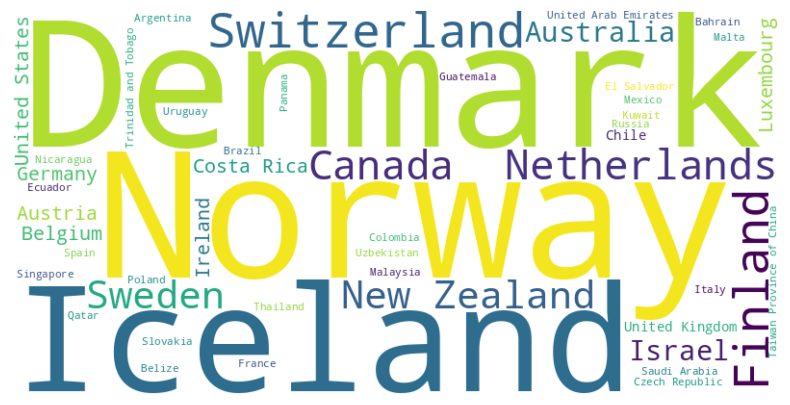

In [ ]:
from wordcloud import WordCloud

first_50_country = df.head(50)

#Tạo từ điển chứa tên quốc gia và điểm số Hạnh phúc của mỗi quốc gia
country_score = dict(zip(first_50_country['Country'].tolist(), first_50_country['Score'].tolist()))
# Tạo Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(country_score)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
compare = {'Region': []}
cols = df.columns
category_col = df.select_dtypes(include=['object', 'category']).columns
cols = cols.drop(category_col)

for i in cols:
    compare [i] = []
compare ['Region'].append('World')
for i in cols:
    compare[i].append(df[i].mean())

compare['Region'].append('Norway')
nw = df[df['Country'] == 'Norway']
for i in cols:
    compare[i].append(float(nw[i]))

compare['Region'].append('Central African Republic')
car = df[df['Country'] == 'Central African Republic']
for i in cols:
    compare[i].append(float(car[i]))

world = pd.DataFrame(compare)
world.drop(['Rank', 'Whisker.high', 'Whisker.low', 'Dystopia'], axis=1 , inplace=True)

world = pd.melt(frame = world, id_vars= 'Region', var_name='Metrics', value_name='Values')

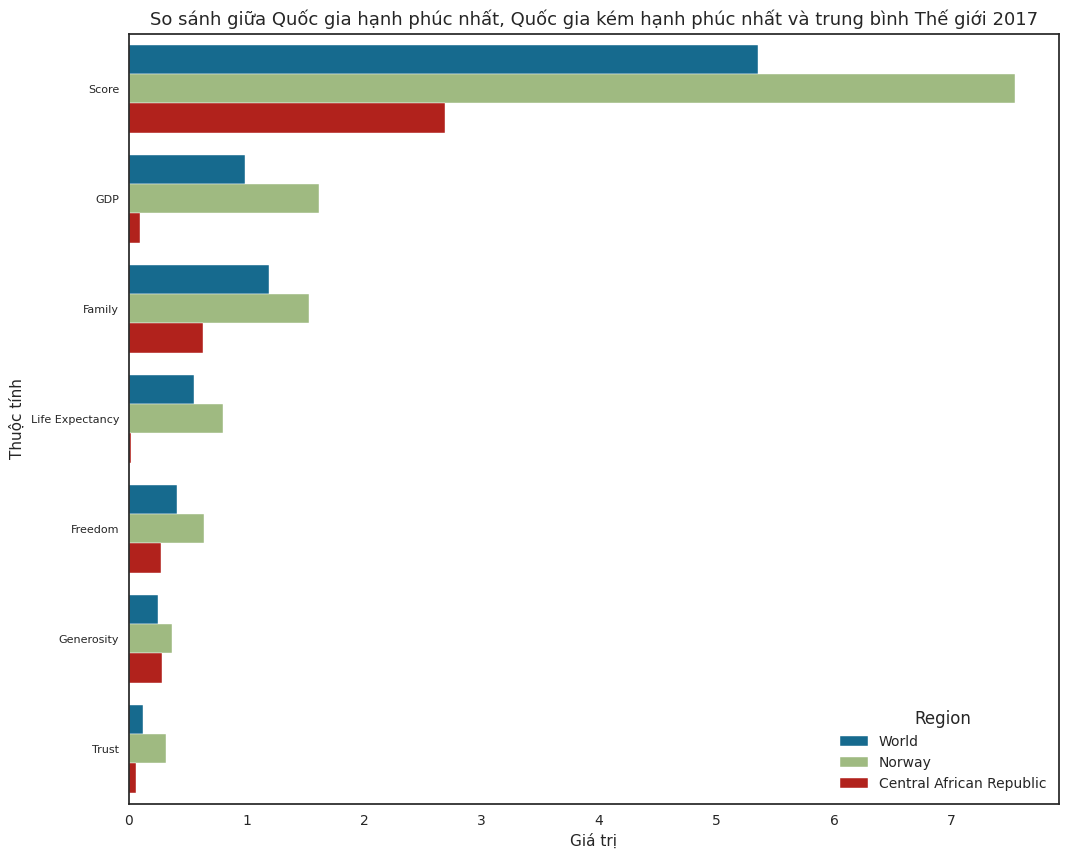

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,10))
plt.title('So sánh giữa Quốc gia hạnh phúc nhất, Quốc gia kém hạnh phúc nhất và trung bình Thế giới 2017', fontsize=13)
plt.yticks(fontsize= 8)
sns.barplot(x= world['Values'], y= world['Metrics'], hue = world['Region'])
plt.xlabel('Giá trị')
plt.ylabel('Thuộc tính')
plt.show()

# 3. PHÂN TÍCH DỮ LIỆU

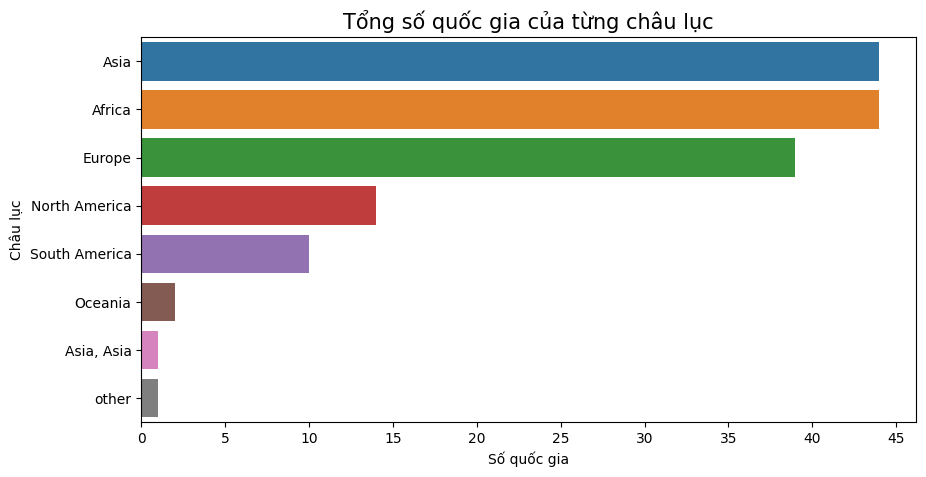

In [ ]:
region = df['Continent'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=region.index, x=region.values, orient='h')
plt.ylabel('Châu lục')
plt.xlabel('Số quốc gia')
plt.title('Tổng số quốc gia của từng châu lục', color = 'Black', fontsize=15)
plt.xticks(np.arange(0, 50, 5))
plt.show()

In [ ]:
# Assuming df is your DataFrame with the Happiness Score data

# Create choropleth map using the new 'Happiness Level'
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Tier",
                    hover_name="Country",
                    title="Bản đồ Choropleth theo mức Chỉ số Hạnh phúc",
                    color_discrete_map={'Low': 'red', 'Low-Mid': 'yellow', 'Top-Mid': 'lightgreen', 'Top': 'darkgreen'})

fig.update_geos(
    projection_type="natural earth",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white"
)

fig.show()

# Save the interactive HTML file
fig.write_html("choropleth_map.html")

# Download the HTML file from Google Colab
from google.colab import files
files.download("choropleth_map.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nhìn chung, có thể thấy các nước thuộc Châu Á và Châu Phi có Happiness Score thấp hơn so với phần còn lại của thế giới, đặc biệt là Châu Phi.

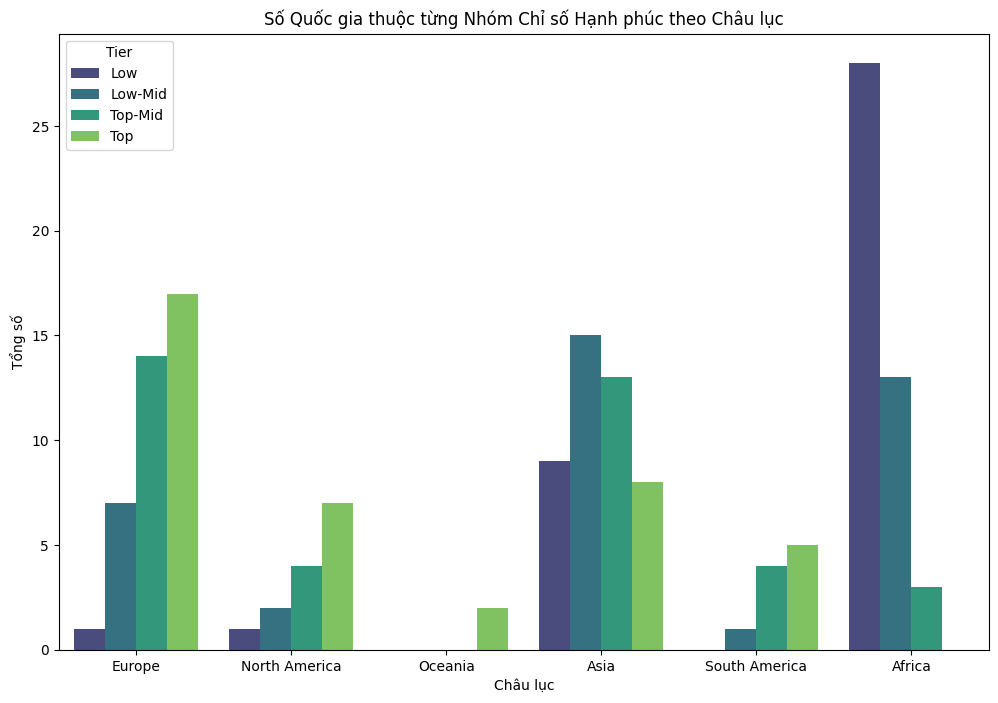

In [ ]:
# Assuming your DataFrame is named df
plt.figure(figsize=(12, 8))
sns.countplot(x='Continent', hue='Tier', data=df, palette='viridis')
plt.title('Số Quốc gia thuộc từng Nhóm Chỉ số Hạnh phúc theo Châu lục')
plt.xlabel('Châu lục')
plt.ylabel('Tổng số')
plt.legend(title='Tier')
plt.show()


GDP, Family và Life Expectancy là các yếu tố có sự tương quan tương đối tuyến tính so với các cặp đặc tính khác.

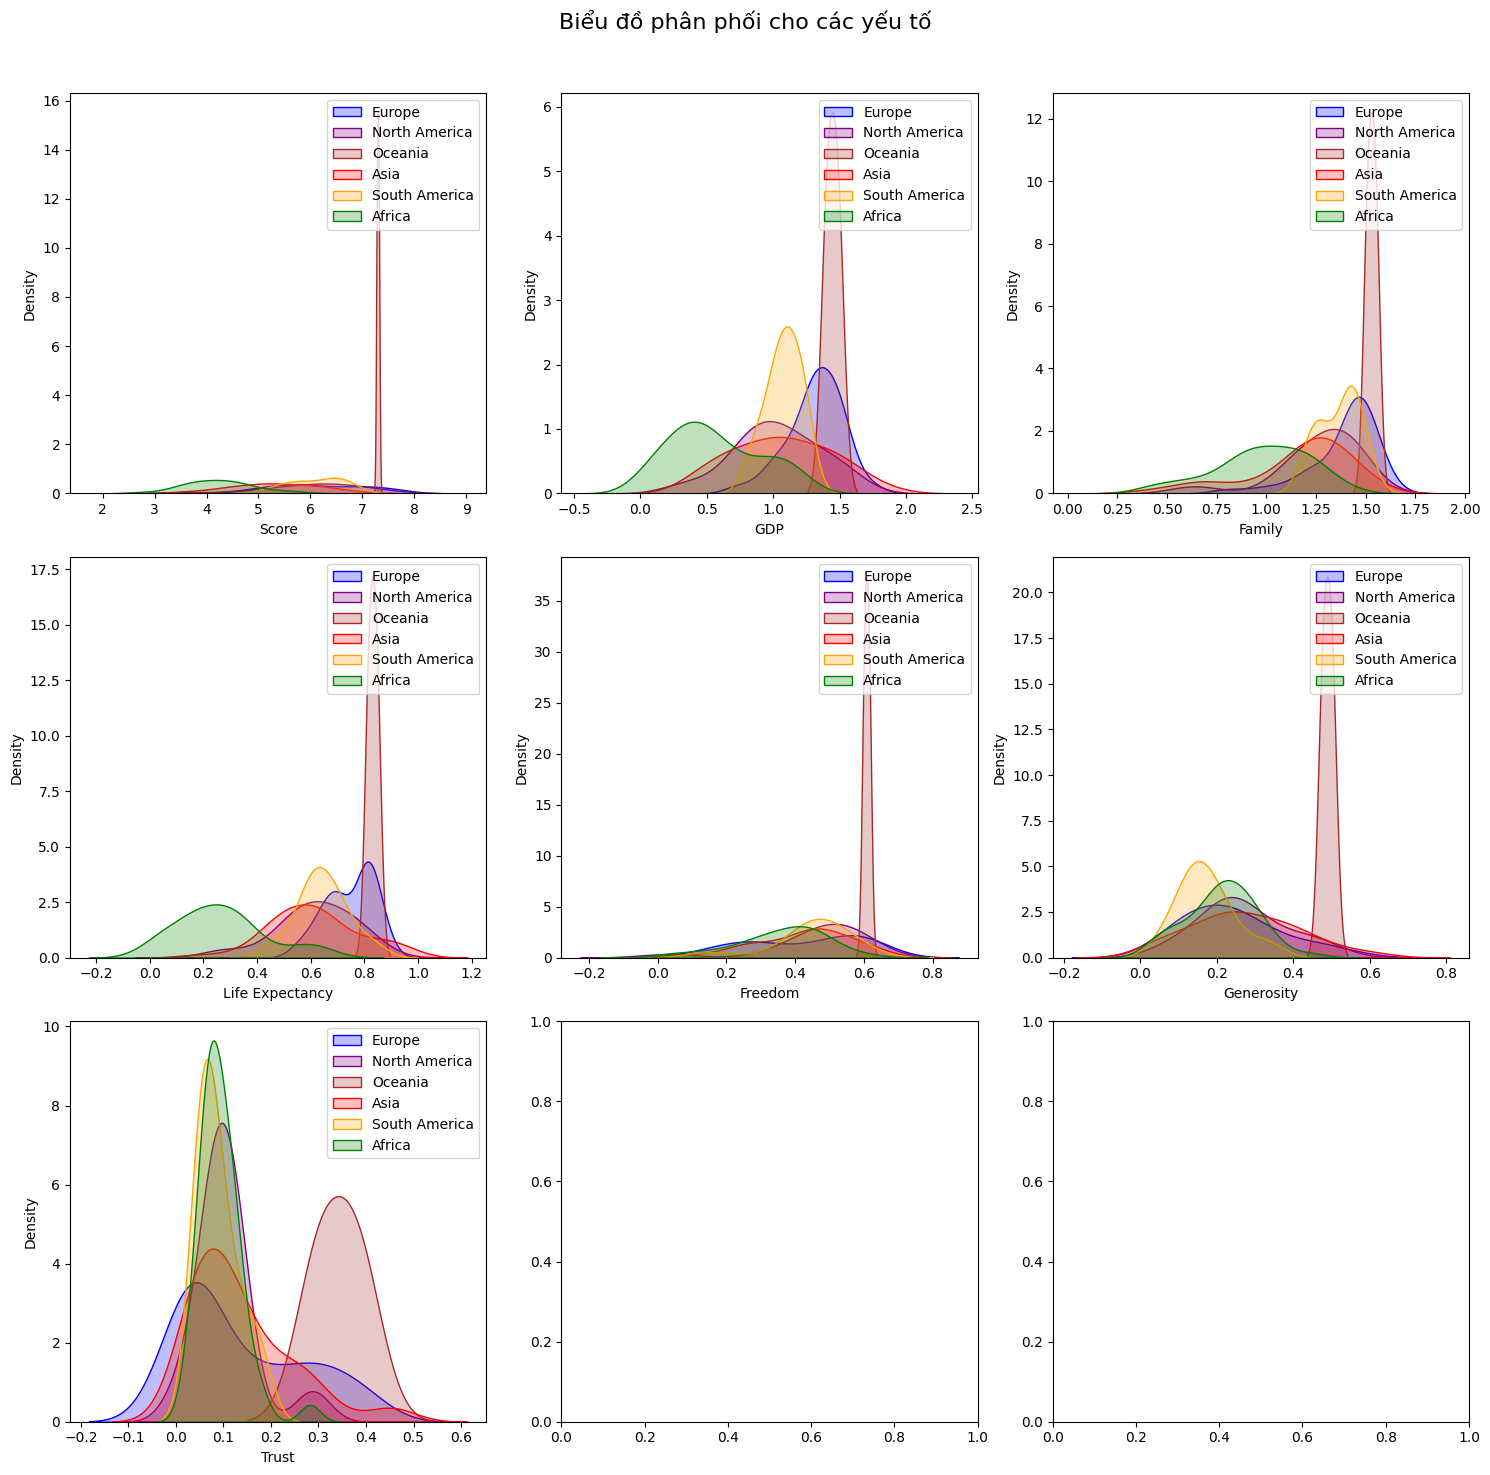

In [ ]:
# Select relevant columns
h_cols = ['Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust', 'Continent']

# Create a DataFrame with selected columns
dfn = df[h_cols]

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Biểu đồ phân phối cho các yếu tố', fontsize=16)

# Define a list of outline colors for each continent
outline_colors = {'Asia': 'red', 'Europe': 'blue', 'Africa': 'green', 'North America': 'purple', 'South America': 'orange', 'Oceania': 'brown'}

# Loop through each column and create a distribution plot for each continent
for i, col in enumerate(dfn.columns[:-1]):  # Exclude the last column ('Continent')
    row_index = i // 3
    col_index = i % 3
    for continent in dfn['Continent'].unique():
        if (row_index, col_index) < (3, 3):  # Only create plots in the first 7 positions
            sns.kdeplot(data=dfn[dfn['Continent'] == continent], x=col, label=continent, fill=True, color=outline_colors.get(continent, 'black'), edgecolor=outline_colors.get(continent, 'black'), ax=axes[row_index, col_index])

            # Add legend to each subplot
            axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


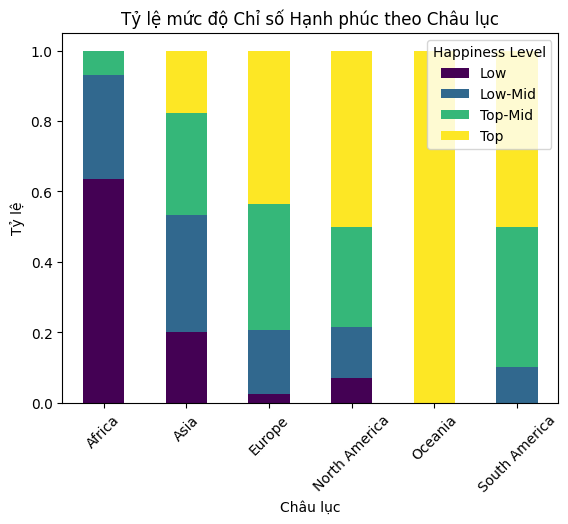

In [ ]:
# Your existing code for creating the pivot table and plotting the bar graph
pivot_table = df.pivot_table(index='Continent', columns='Tier', aggfunc='size', fill_value=0)
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Use Viridis color map
ax = pivot_table.plot(kind='bar', stacked=True, colormap='viridis')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add title, labels, and legend
plt.title('Tỷ lệ mức độ Chỉ số Hạnh phúc theo Châu lục')
plt.xlabel('Châu lục')
plt.ylabel('Tỷ lệ')
plt.legend(title='Happiness Level')

# Show the plot
plt.show()


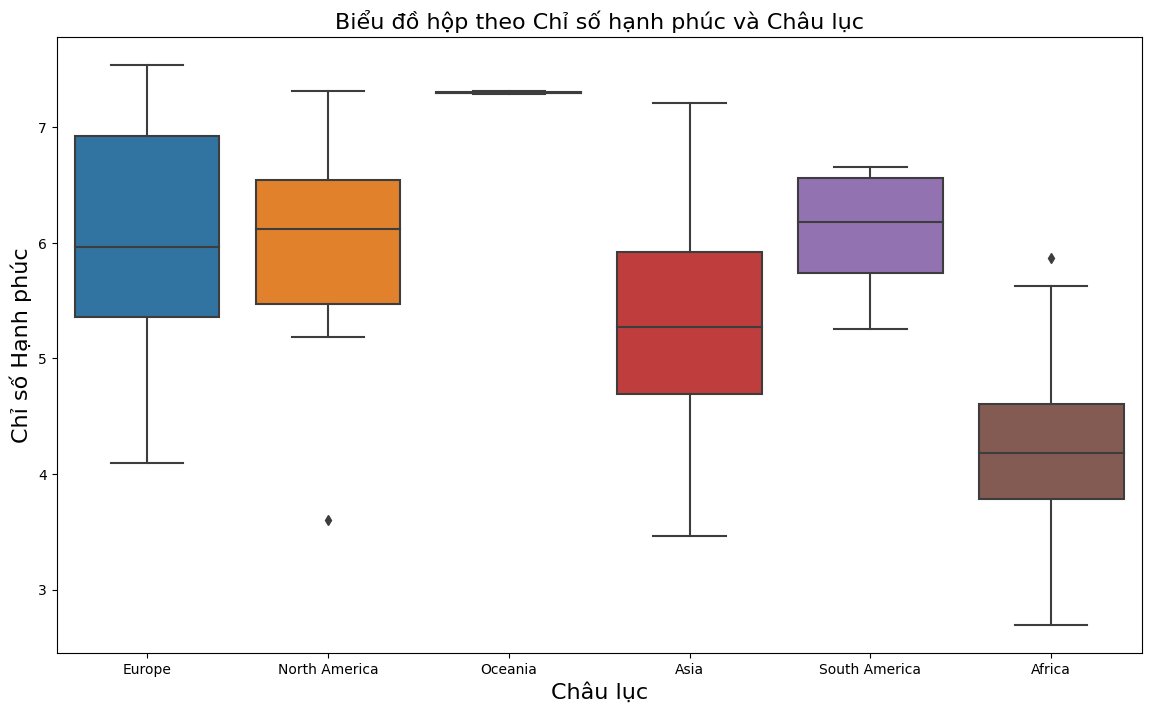

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a boxplot with colors based on 'Happiness Level'
sns.boxplot(x='Continent', y='Score', data=df)

# Set labels and title
plt.xlabel('Châu lục',fontsize=16)
plt.ylabel('Chỉ số Hạnh phúc',fontsize=16)
plt.title('Biểu đồ hộp theo Chỉ số hạnh phúc và Châu lục',fontsize=16)

# Show the plot
plt.show()


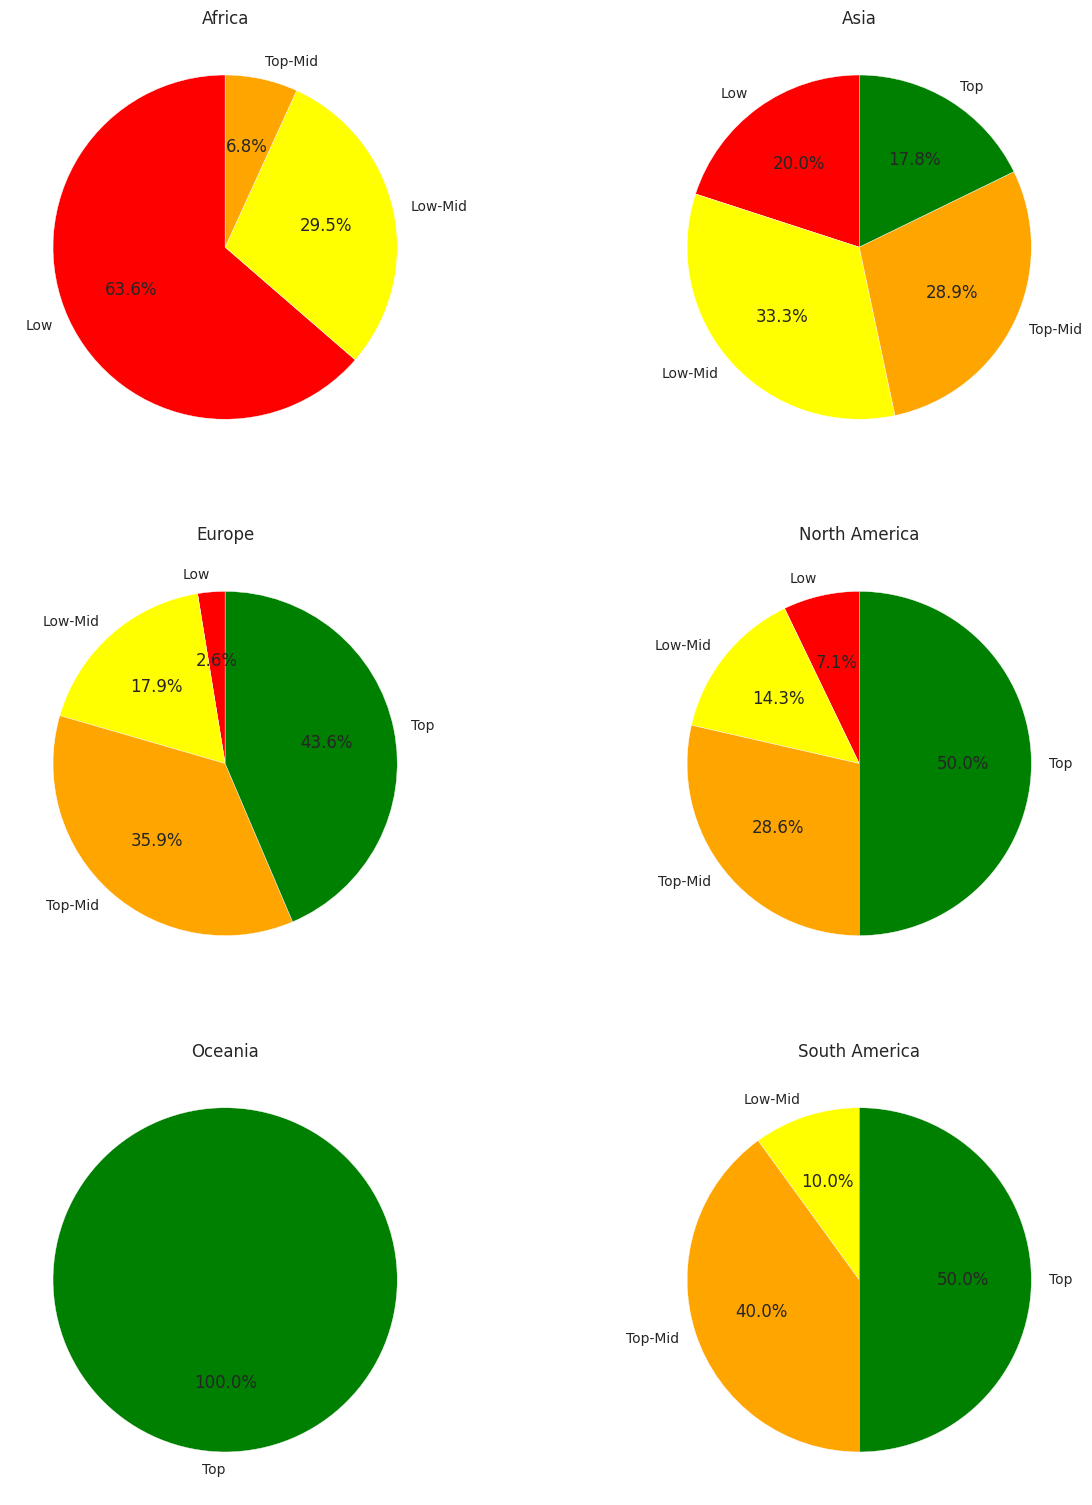

In [ ]:
# Tính tổng số lục địa trong từng category và mỗi lục địa
continent_category_counts = df.groupby(['Tier', 'Continent']).size().unstack()
continent_category_counts = continent_category_counts.fillna(0)
continent_category_counts

colors_dict = {}
for tier in continent_category_counts.index:
    for category in continent_category_counts.columns:
        if continent_category_counts.loc[tier, category] != 0:
            colors_dict[(tier, category)] = 'red' if tier == 'Low' else 'orange' if tier == 'Top-Mid' else 'yellow' if tier == 'Low-Mid' else 'green'

# Vẽ biểu đồ tròn cho từng category
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 19))

for i, category in enumerate(continent_category_counts.columns):
    if any(continent_category_counts[category] != 0):
        plt.subplot(3, 2, i + 1 )
        non_zero_percentages = continent_category_counts[category][continent_category_counts[category] != 0]
        colors = [colors_dict[(tier, category)] for tier in non_zero_percentages.index]
        plt.pie(non_zero_percentages, labels=non_zero_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title(category)

# Hiển thị biểu đồ
plt.show()

Lục địa Oceania có độ nhất quán về Chỉ số Hạnh phúc tốt nhất. Mặt khác, Châu Á và Châu Âu lại có sự biến đổi về Chỉ số Hạnh phúc nhiều nhất.

In [ ]:
# Create a boolean mask for the conditions
mask = (df['Tier'] == 'Low') & (df['Continent'] == 'Europe')

# Use the mask to filter the DataFrame
selected_countries = df[mask]

print(selected_countries[['Country', 'Tier', 'Continent']])

     Country Tier Continent
131  Ukraine  Low    Europe


In [ ]:
# Assuming df is your DataFrame with the necessary columns

# Create a boolean mask for the condition
europe_mask = (df['Continent'] == 'Europe')

# Filter the DataFrame for Europe
europe_df = df[europe_mask]

# Get the top 5 lowest scores in Europe
top_5_lowest_europe = europe_df.nsmallest(5, 'Score')

# Print the top 5 lowest scores
print(top_5_lowest_europe[['Country', 'Score', 'Continent','Tier']])


                    Country  Score Continent     Tier
131                 Ukraine  4.096    Europe      Low
108                 Albania  4.644    Europe  Low-Mid
104                Bulgaria  4.714    Europe  Low-Mid
91                Macedonia  5.175    Europe  Low-Mid
89   Bosnia and Herzegovina  5.182    Europe  Low-Mid


In [ ]:
# Assuming df is your DataFrame with the necessary columns

# Find the index of the country in Africa with the highest score
max_score_africa_index = df[df['Continent'] == 'Africa']['Score'].idxmax()

# Find the index of the country in North America with the lowest score
min_score_north_america_index = df[df['Continent'] == 'North America']['Score'].idxmin()

# Print the entire row for the country in Africa with the highest score
print("Row for the Country in Africa with the Highest Score:")
print(df.loc[max_score_africa_index])

# Print the entire row for the country in North America with the lowest score
print("\nRow for the Country in North America with the Lowest Score:")
print(df.loc[min_score_north_america_index])


Row for the Country in Africa with the Highest Score:
Country             Algeria
Rank                     53
Score                 5.872
Whisker.high       5.978286
Whisker.low        5.765714
GDP                1.091864
Family             1.146217
Life Expectancy    0.617585
Freedom            0.233336
Generosity         0.069437
Trust              0.146096
Dystopia           2.567604
Tier                Top-Mid
Continent            Africa
Name: 52, dtype: object

Row for the Country in North America with the Lowest Score:
Country                    Haiti
Rank                         145
Score                      3.603
Whisker.high            3.734715
Whisker.low             3.471285
GDP                      0.36861
Family                   0.64045
Life Expectancy         0.277321
Freedom                  0.03037
Generosity              0.489204
Trust                   0.099872
Dystopia                1.697168
Tier                         Low
Continent          North America
Name: 1

In [ ]:
# Columns to exclude
exclude_columns = ['Rank','Whisker.high','Whisker.low']

# Find the mean values for Haiti excluding specified columns
mean_values_haiti = df[df['Country'] == 'Haiti'].drop(columns=exclude_columns).mean()

# Find the mean values for North America excluding specified columns
mean_values_north_america = df[df['Continent'] == 'North America'].drop(columns=exclude_columns).mean()

# Find the mean values for the entire world excluding specified columns
mean_values_world = df.drop(columns=exclude_columns).mean()

# Find the mean values for rows where Tier is 'Low' excluding specified columns
mean_values_low_tier = df[df['Tier'] == 'Low'].drop(columns=exclude_columns).mean()

# Create a new DataFrame
new_table = pd.DataFrame({
    'Haiti': mean_values_haiti,
    'North America': mean_values_north_america,
    'The World': mean_values_world,
    'Low Tier': mean_values_low_tier
})

# Transpose the new table for better readability
new_table = new_table.T

# Print the new table
print(new_table)


                  Score       GDP    Family  Life Expectancy   Freedom  \
Haiti          3.603000  0.368610  0.640450         0.277321  0.030370   
North America  6.028214  1.029618  1.260238         0.615700  0.467324   
The World      5.354506  0.985529  1.193319         0.552206  0.411363   
Low Tier       3.902128  0.543410  0.914783         0.294243  0.310252   

               Generosity     Trust  Dystopia  
Haiti            0.489204  0.099872  1.697168  
North America    0.267799  0.105196  2.282197  
The World        0.244075  0.121682  1.849197  
Low Tier         0.236904  0.090412  1.531606  


In [ ]:
# Assuming df is your DataFrame with the necessary columns

# Columns to exclude
exclude_columns = ['Rank','Whisker.high','Whisker.low']

# Find rows where 'Country' is 'Algeria'
algeria_data = df[df['Country'] == 'Algeria']

# Find the mean values for Algeria excluding specified columns
mean_values_algeria = algeria_data.drop(columns=exclude_columns).mean()

# Find the mean values for Africa excluding specified columns
mean_values_africa = df[df['Continent'] == 'Africa'].drop(columns=exclude_columns).mean()

# Find the mean values for rows where Tier is 'Top' excluding specified columns
mean_values_top_tier = df[df['Tier'] == 'Top'].drop(columns=exclude_columns).mean()

# Find the mean values for the entire world excluding specified columns
mean_values_world = df.drop(columns=exclude_columns).mean()

# Create a new DataFrame
new_table = pd.DataFrame({
    'Algeria': mean_values_algeria,
    'Africa': mean_values_africa,
    'Top Tier': mean_values_top_tier,
    'The World': mean_values_world
})

# Transpose the new table for better readability
new_table = new_table.T

# Print the new table
print(new_table)


              Score       GDP    Family  Life Expectancy   Freedom  \
Algeria    5.872000  1.091864  1.146217         0.617585  0.233336   
Africa     4.239500  0.562013  0.976752         0.267229  0.357671   
Top Tier   6.820718  1.410892  1.425698         0.763412  0.537917   
The World  5.354506  0.985529  1.193319         0.552206  0.411363   

           Generosity     Trust  Dystopia  
Algeria      0.069437  0.146096  2.567604  
Africa       0.213328  0.093601  1.786173  
Top Tier     0.310583  0.210881  2.161280  
The World    0.244075  0.121682  1.849197  


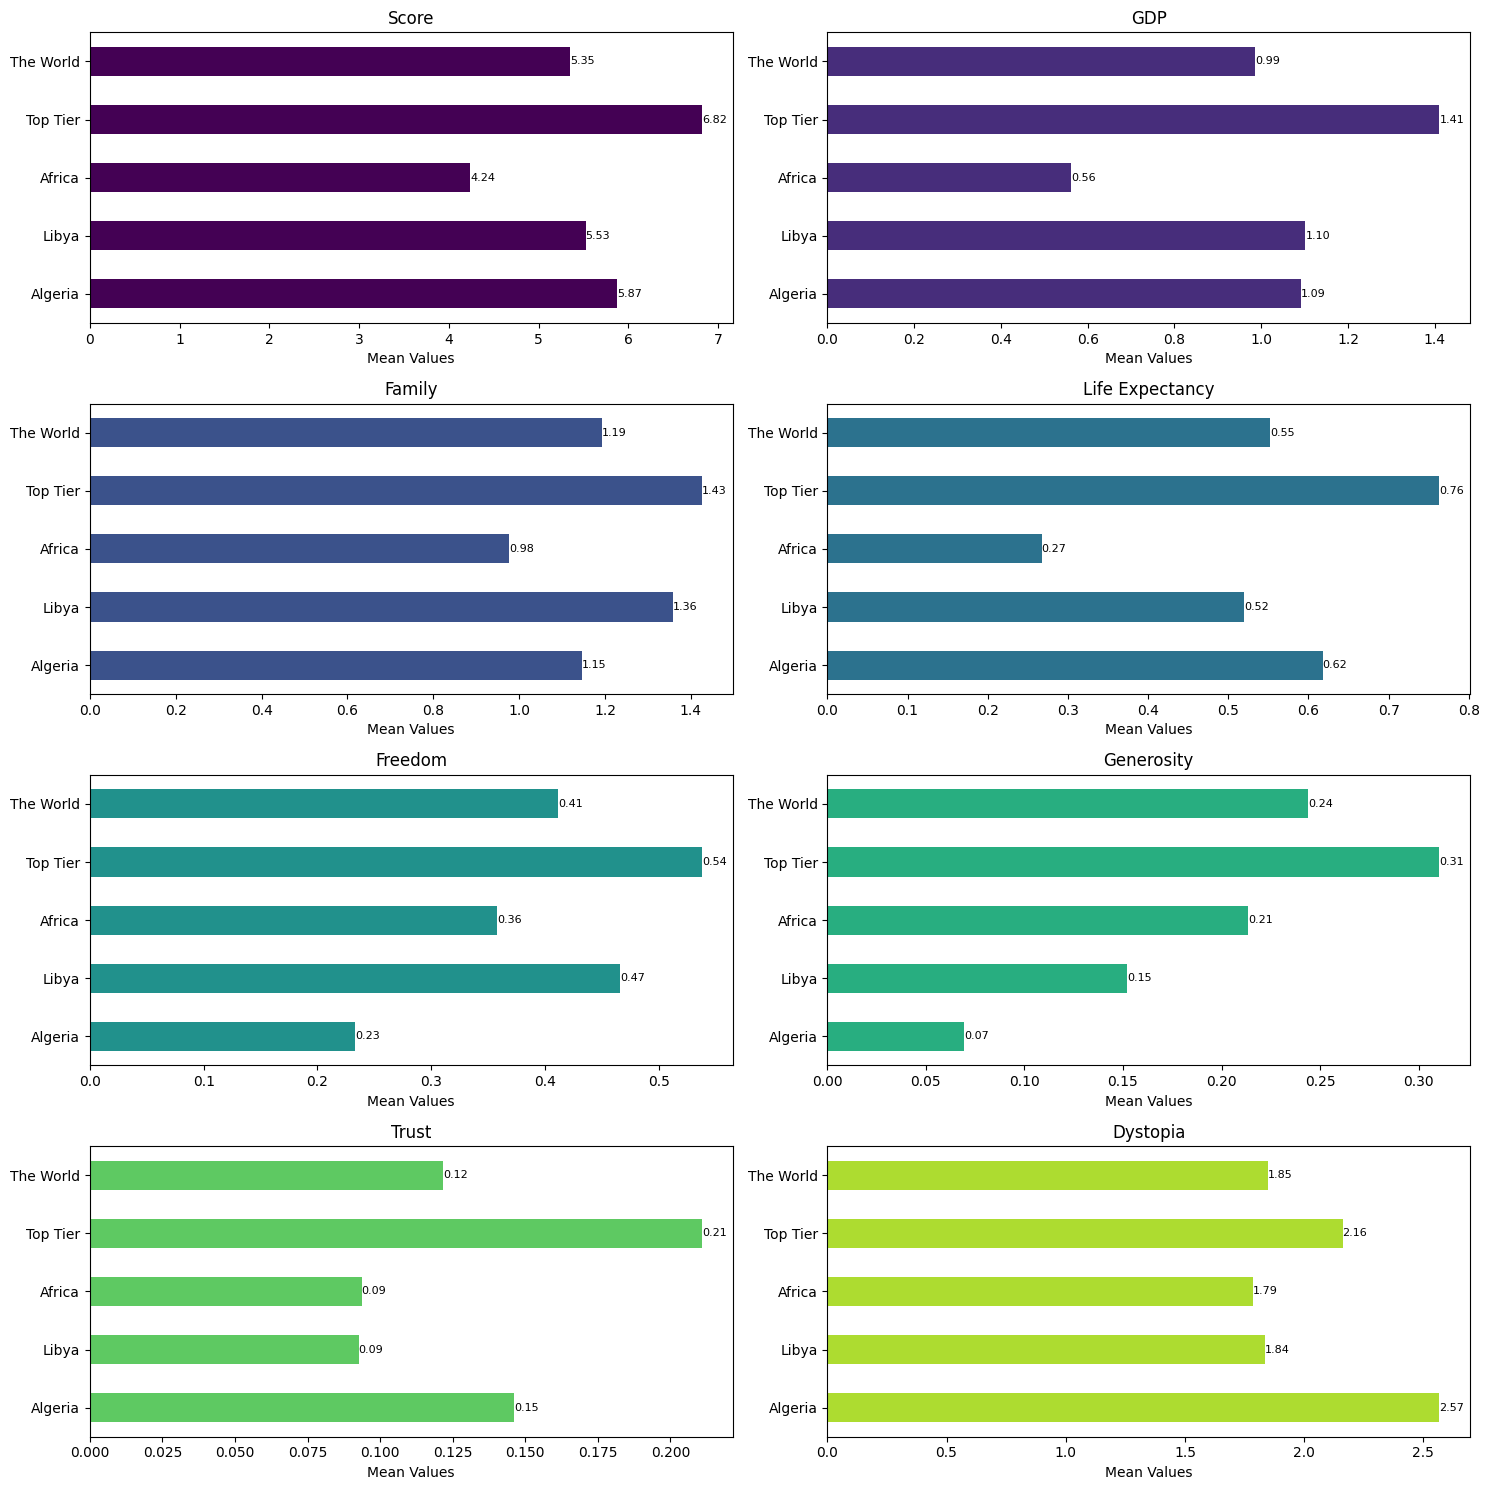

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the necessary columns

# Columns to exclude
exclude_columns = ['Rank','Whisker.high','Whisker.low']

# Find rows where 'Country' is 'Algeria' or 'Libya'
algeria_data = df[df['Country'].isin(['Algeria', 'Libya'])]

# Find the mean values for Algeria and Libya excluding specified columns
mean_values_algeria = df[df['Country'] == 'Algeria'].drop(columns=exclude_columns).mean()
mean_values_libya = df[df['Country'] == 'Libya'].drop(columns=exclude_columns).mean()

# Find the mean values for Africa excluding specified columns
mean_values_africa = df[df['Continent'] == 'Africa'].drop(columns=exclude_columns).mean()

# Find the mean values for rows where Tier is 'Top' excluding specified columns
mean_values_top_tier = df[df['Tier'] == 'Top'].drop(columns=exclude_columns).mean()

# Find the mean values for the entire world excluding specified columns
mean_values_world = df.drop(columns=exclude_columns).mean()

# Create a new DataFrame
new_table = pd.DataFrame({
    'Algeria': mean_values_algeria,
    'Libya': mean_values_libya,
    'Africa': mean_values_africa,
    'Top Tier': mean_values_top_tier,
    'The World': mean_values_world
})

# Transpose the new table for better readability
new_table = new_table.T

# Plot horizontal bar graphs for each column in a 2x5 grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, (column, ax) in enumerate(zip(new_table.columns, axes.flatten())):
    color = plt.cm.viridis(i / len(new_table.columns))
    new_table[column].plot(kind='barh', ax=ax, color=color)
    ax.set_title(column)
    ax.set_xlabel('Mean Values')

    # Add labels for each bar with the corresponding mean value
    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
                va='center', ha='left', color='black', fontsize=8)

plt.tight_layout()
plt.show()


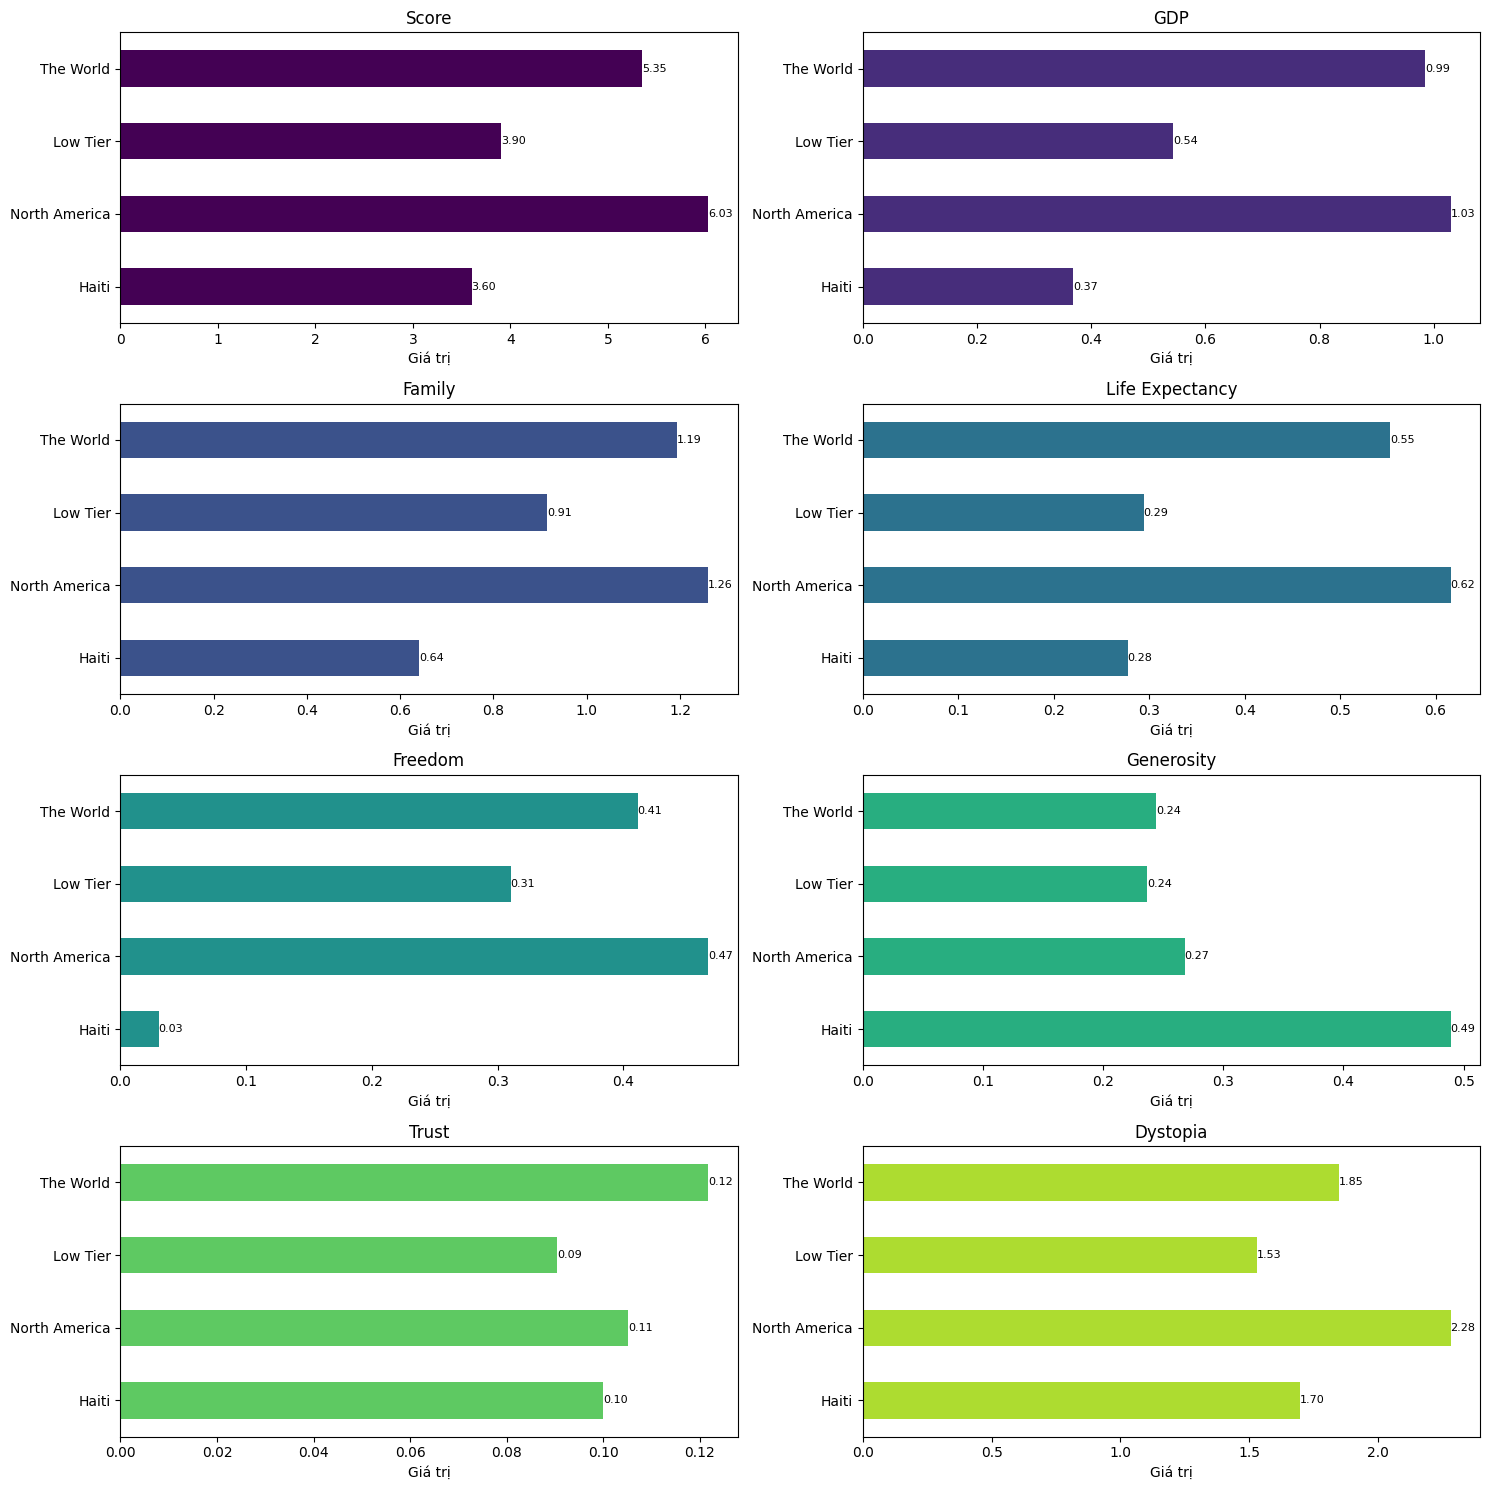

In [ ]:
# Assuming df is your DataFrame with the necessary columns

# Columns to exclude
exclude_columns = ['Rank', 'Whisker.high','Whisker.low']

# Find rows where 'Country' is 'Haiti'
haiti = df[df['Country'] == 'Haiti']

# Find the mean values for Haiti excluding specified columns
mean_values_haiti = haiti.drop(columns=exclude_columns).mean()

# Find the mean values for North America excluding specified columns
mean_values_north_america = df[df['Continent'] == 'North America'].drop(columns=exclude_columns).mean()

# Find the mean values for rows where Tier is 'Low' excluding specified columns
mean_values_low_tier = df[df['Tier'] == 'Low'].drop(columns=exclude_columns).mean()

# Find the mean values for the entire world excluding specified columns
mean_values_world = df.drop(columns=exclude_columns).mean()

# Create a new DataFrame
new_table_haiti_na_low = pd.DataFrame({
    'Haiti': mean_values_haiti,
    'North America': mean_values_north_america,
    'Low Tier': mean_values_low_tier,
    'The World': mean_values_world
})

# Transpose the new table for better readability
new_table_haiti_na_low = new_table_haiti_na_low.T

# Plot horizontal bar graphs for each column in a 2x4 grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, (column, ax) in enumerate(zip(new_table_haiti_na_low.columns, axes.flatten())):
    color = plt.cm.viridis(i / len(new_table_haiti_na_low.columns))
    new_table_haiti_na_low[column].plot(kind='barh', ax=ax, color=color)
    ax.set_title(column)
    ax.set_xlabel('Giá trị')

    # Add labels for each bar with the corresponding mean value
    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
                va='center', ha='left', color='black', fontsize=8)

plt.tight_layout()
plt.show()


**Trung bình các biến số**

In [ ]:
# Calculate the mean grouped by Continent
mean_df = df.groupby('Continent').mean().reset_index()

# Export results to a new DataFrame if needed
mean_df.to_csv('mean_results.csv', index=False)

# Apply styling with viridis colormap
styled_df = mean_df.style.background_gradient(cmap='viridis')

styled_df

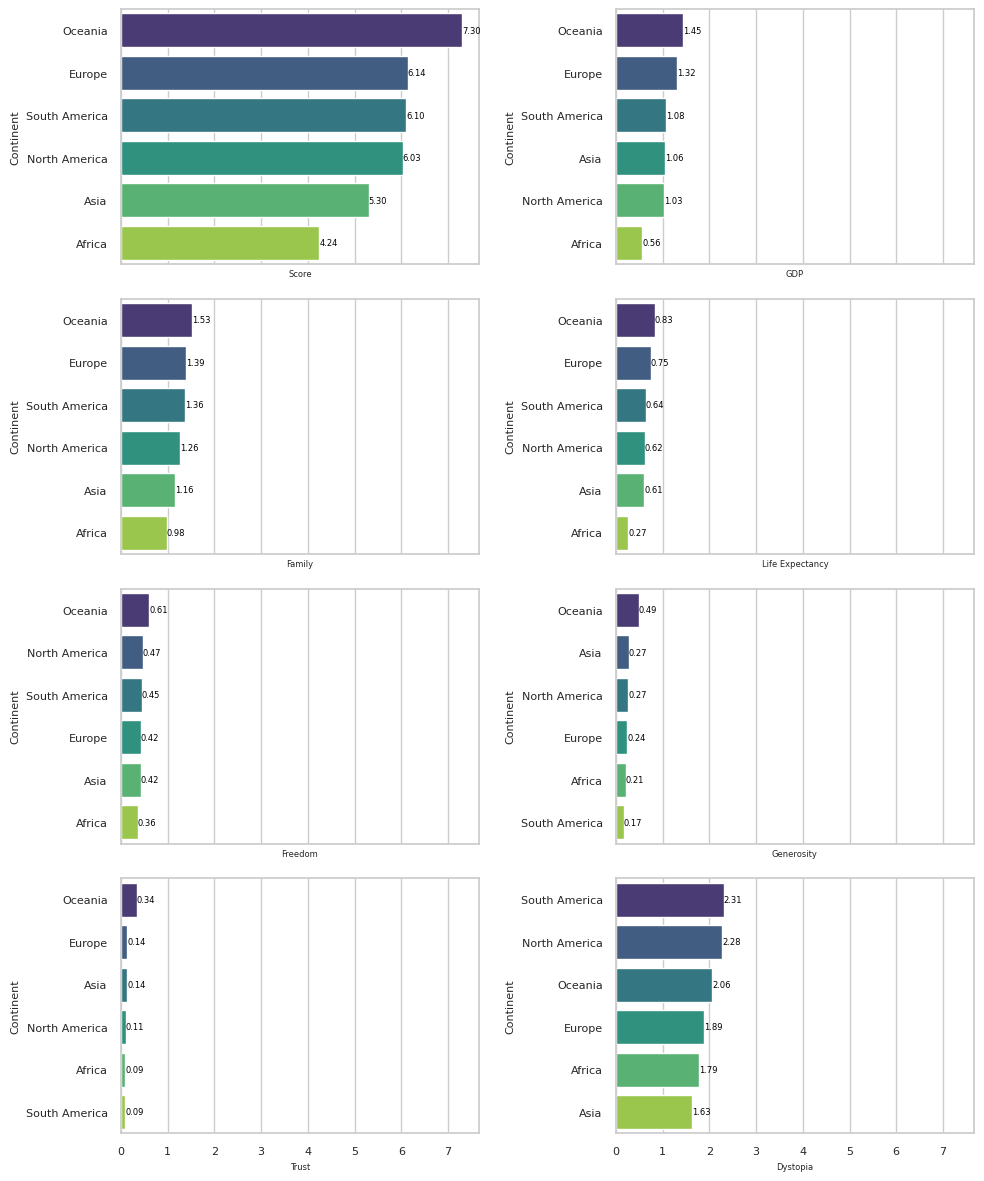

In [ ]:
# Calculate the mean grouped by Continent
mean_df = df.groupby('Continent').mean().reset_index()

# Set the style for the plots
sns.set(style="whitegrid")

# Define the list of columns to visualize
columns_to_visualize = ['Score', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust', 'Dystopia']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12), sharex=True)

# Add padding between subplots
plt.subplots_adjust(hspace=10, wspace=10)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over columns and plot
for i, column in enumerate(columns_to_visualize):
    ax = sns.barplot(x=column, y='Continent', data=mean_df.sort_values(by=column, ascending=False), ax=axes[i], palette='viridis', orient='h')

    # Add value labels with even more space
    for p in ax.patches:
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2., f'{p.get_width():.2f}', ha='center', va='center', fontsize=6, color='black')

    ax.set_xlabel(column, fontsize=6)  # Set smaller x-axis label size
    ax.set_ylabel('Continent', fontsize=8)  # Set smaller y-axis label size
    ax.tick_params(axis='both', labelsize=8)  # Set smaller tick label size

# Adjust layout
plt.tight_layout()
plt.show()

**Khoảng giá trị - CI**

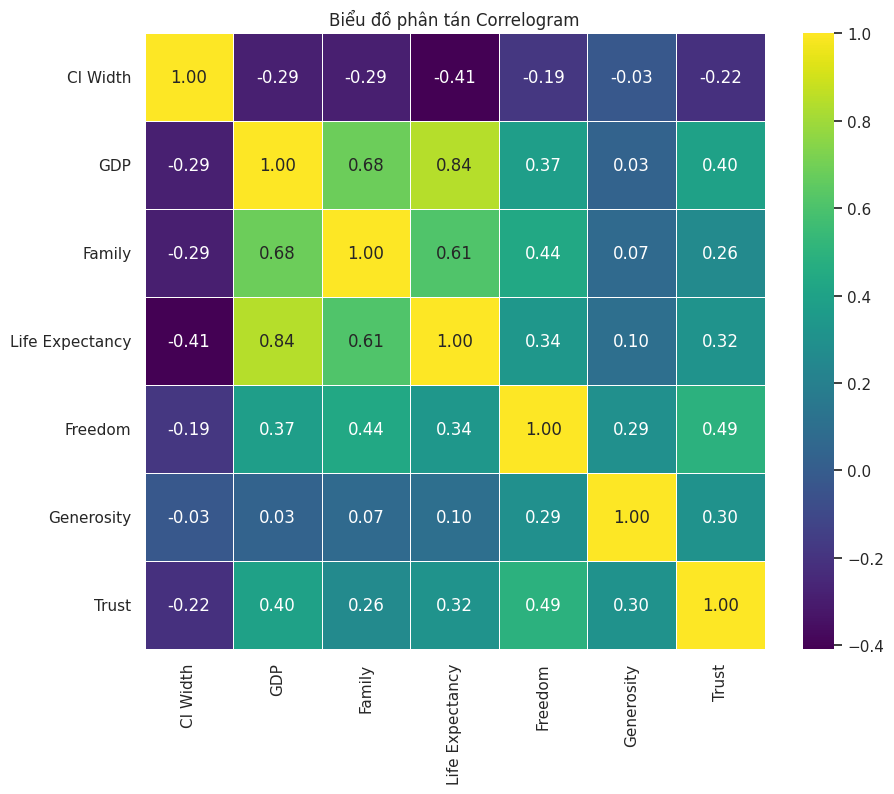

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate the width of the confidence interval
df['CI Width'] = df['Whisker.high'] - df['Whisker.low']

# Select variables you want to explore for correlation
variables_of_interest = ['CI Width', 'GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust']

# Create a correlation matrix
correlation_matrix = df[variables_of_interest].corr()

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Biểu đồ phân tán Correlogram')
plt.show()


Đáng chú ý thay, độ dài khoảng tin cậy của Chỉ số hạnh phúc có tương quan nghịch với mọi yếu tố, với Tuổi thọ trung bình có tương quan mạnh nhất.

**Độ quan trọng của yếu tố**

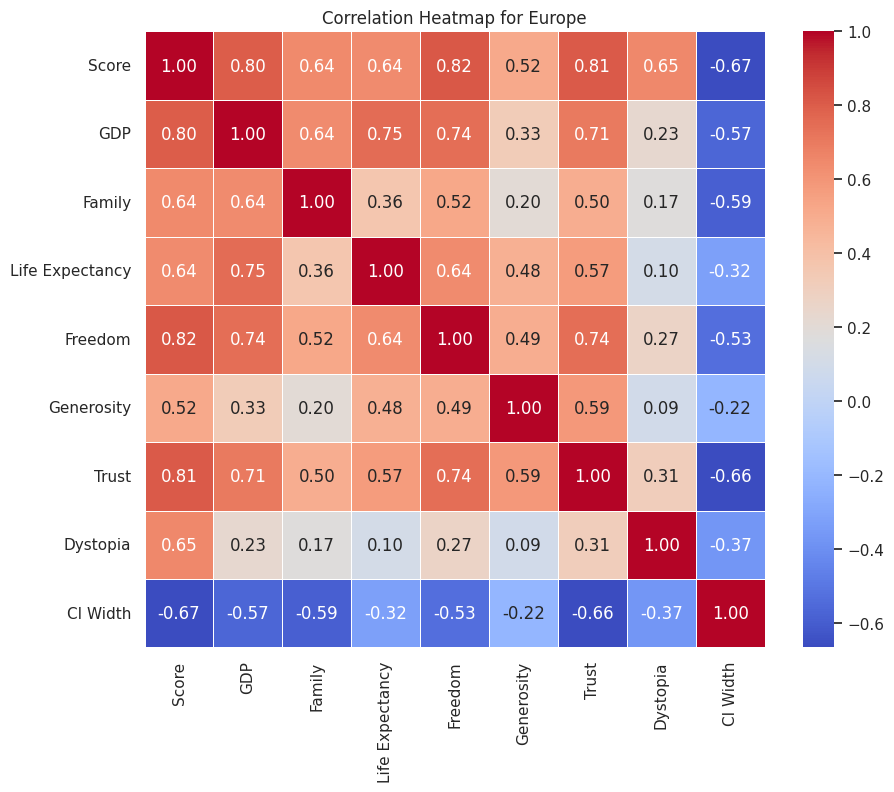

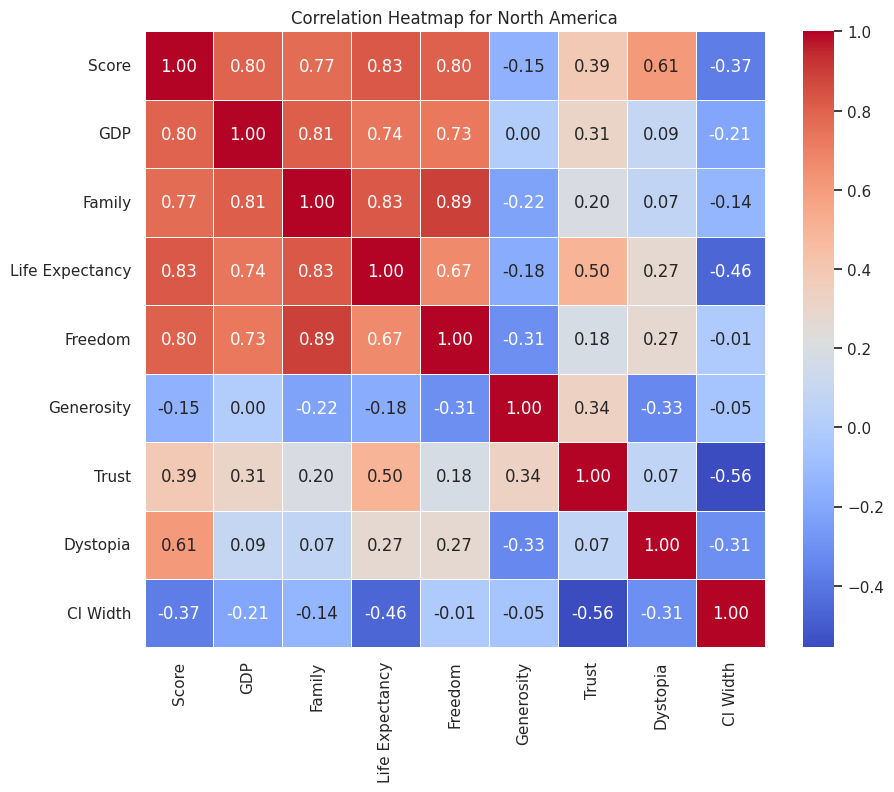

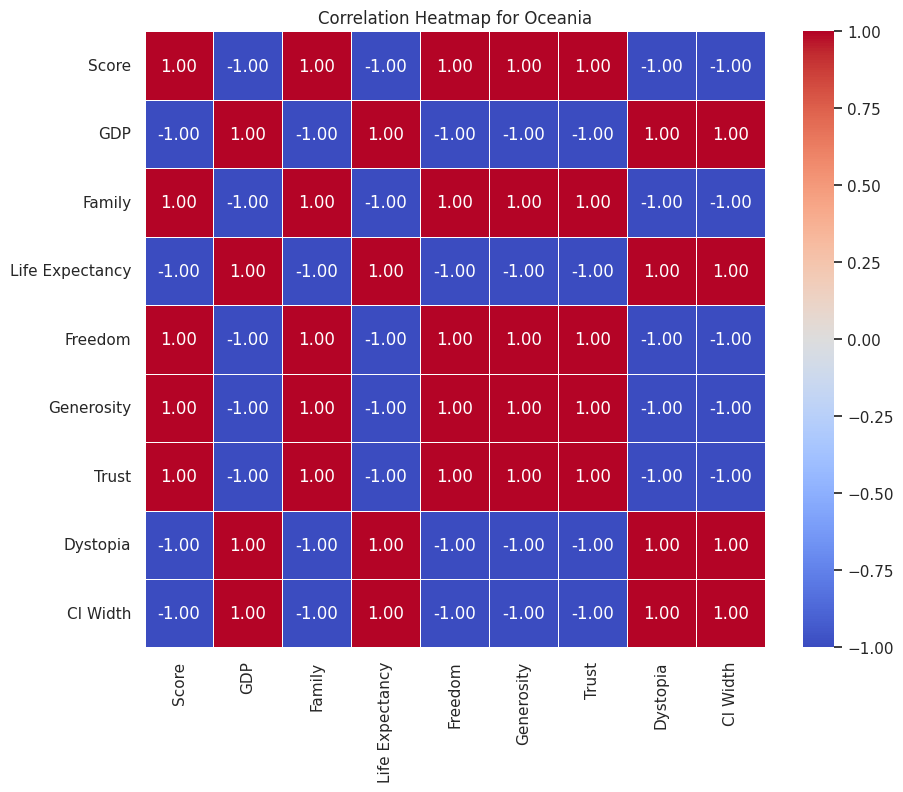

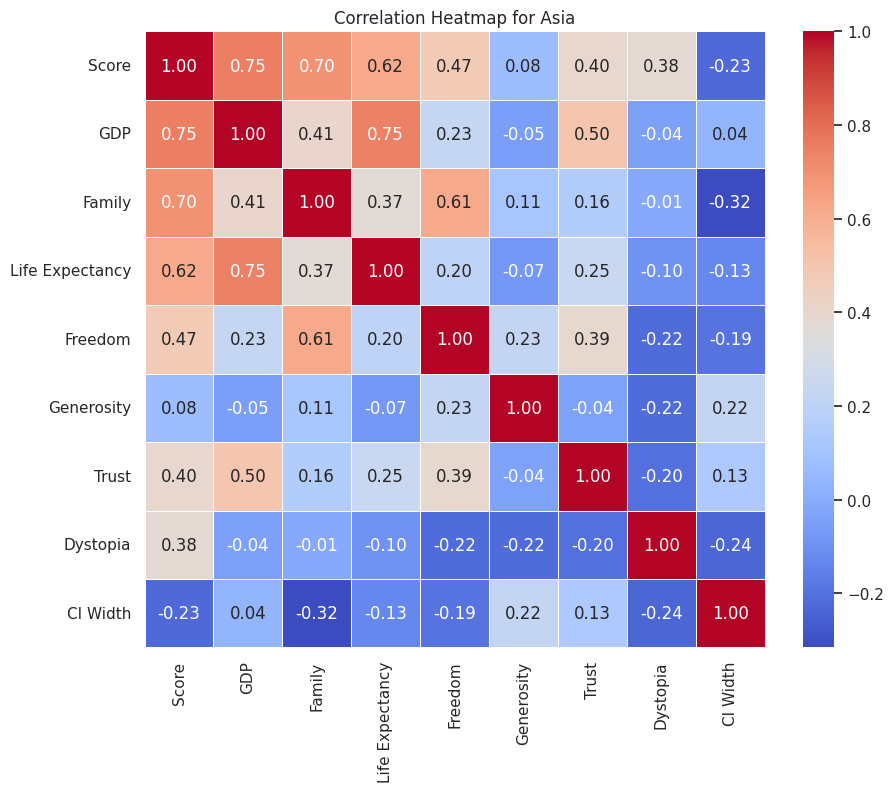

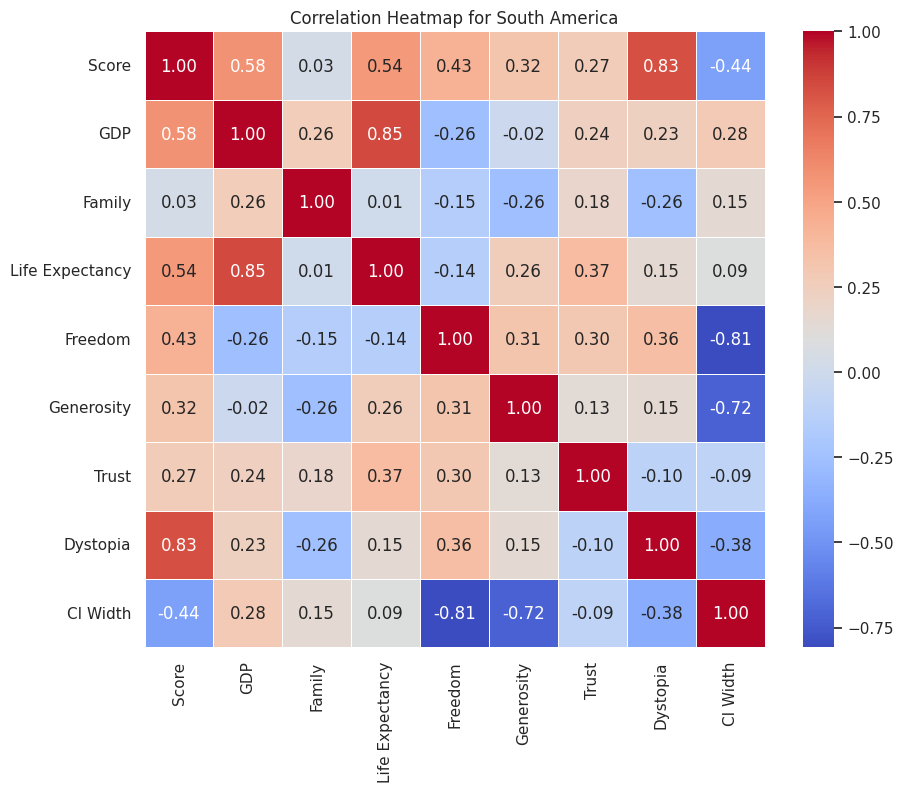

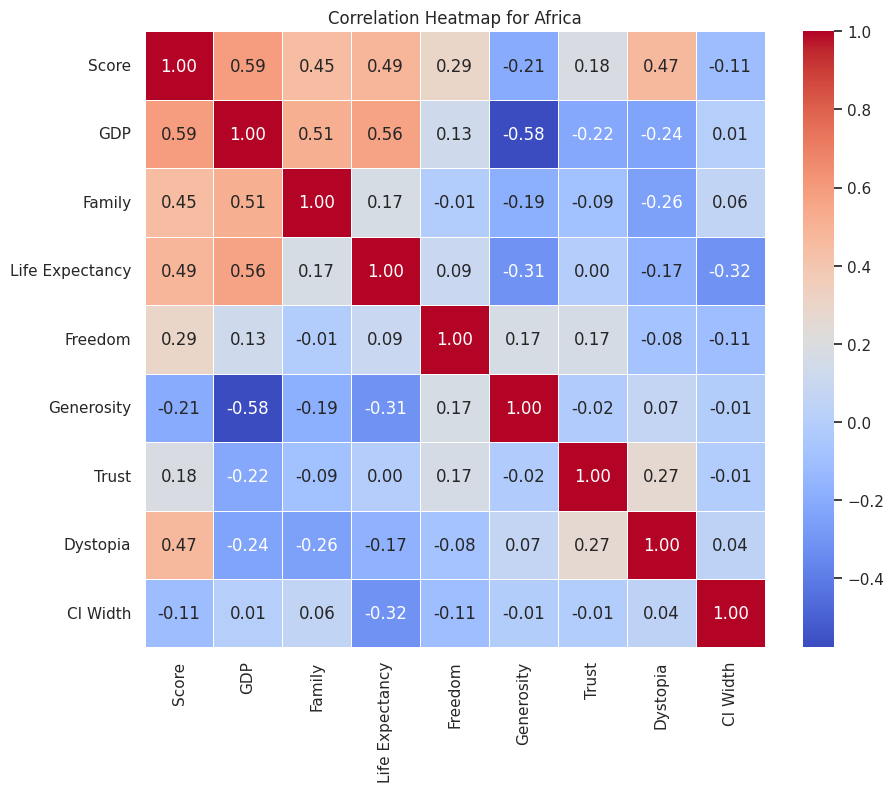

In [ ]:
# Đặc điểm cần loại bỏ
exclude_columns = ['Rank', 'Whisker.high', 'Whisker.low']

# Lặp qua từng châu lục
for continent in df['Continent'].unique():
    # Lọc DataFrame cho từng châu lục
    continent_df = df[df['Continent'] == continent]

    # Loại bỏ các cột không mong muốn
    filtered_df = continent_df.drop(columns=exclude_columns)

    # Tính toán ma trận tương quan
    correlation_matrix = filtered_df.corr()

    # Vẽ heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap for {continent}')
    plt.show()


In [ ]:
# Loại bỏ các cột không cần thiết
columns_to_exclude = ['Rank', 'Country', 'Whisker.high', 'Whisker.low', 'Continent', 'Tier', 'Dystopia'
                      ]
df_filtered = df.drop(columns=columns_to_exclude)

# Tính correlation giữa 'Happiness' và các cột còn lại
correlations = df_filtered.corr()['Score'].drop('Score')

# Chọn cột có correlation cao nhất, nếu là 'Score' thì chọn cột cao thứ 2
df['Top Feature'] = df_filtered.apply(lambda row: row.idxmax() if row.idxmax() != 'Score' else row.drop('Score').idxmax(), axis=1)

# In ra correlation và dataframe mới
print("Correlation with Happiness:")
print(correlations)

print("\nUpdated DataFrame:")
print(df)


Correlation with Happiness:
GDP                0.811702
Family             0.752690
Life Expectancy    0.782816
Freedom            0.568548
Generosity         0.189088
Trust              0.482826
CI Width          -0.350324
Name: Score, dtype: float64

Updated DataFrame:
                      Country  Rank  Score  Whisker.high  Whisker.low  \
0                      Norway     1  7.537      7.594445     7.479556   
1                     Denmark     2  7.522      7.581728     7.462272   
2                     Iceland     3  7.504      7.622030     7.385970   
3                 Switzerland     4  7.494      7.561772     7.426227   
4                     Finland     5  7.469      7.527542     7.410458   
..                        ...   ...    ...           ...          ...   
150                    Rwanda   151  3.471      3.543030     3.398970   
151                     Syria   152  3.462      3.663669     3.260331   
152                  Tanzania   153  3.349      3.461430     3.236570  

In [ ]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Top Feature',
                    title='Choropleth Map of Top Feature by Country',
                    color_continuous_scale='Viridis')

# Hiển thị đồ thị
fig.show()

In [ ]:
# Filter the DataFrame based on 'Top Feature' == 'GDP'
df_gdp = df[df['Top Feature'] == 'GDP']

# Group by 'Continent' and count the number of rows
gdp_by_continent = df_gdp.groupby('Continent').size().reset_index(name='Count')

# Print the result
print("Number of Rows with Top Feature 'GDP' Grouped by Continent:")
print(gdp_by_continent)

Number of Rows with Top Feature 'GDP' Grouped by Continent:
       Continent  Count
0         Africa      3
1           Asia     19
2         Europe     13
3  North America      1


In [ ]:
# Sort the DataFrame by 'Count' in descending order
gdp_by_continent_sorted = gdp_by_continent.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart with color
fig = px.bar(gdp_by_continent_sorted,
             x='Count',
             y='Continent',
             orientation='h',
             color='Count',  # Color by count
             color_continuous_scale='Viridis',  # Choose a color scale
             title='Số quốc gia có Top Feature theo châu lục',
             labels={'Count': 'Số quốc gia'},
             category_orders={'Châu lục': gdp_by_continent_sorted['Continent'].tolist()})  # Preserve the original order

# Add labels for the bar values next to each bar
fig.update_traces(text=gdp_by_continent_sorted['Count'].astype(str), textposition='outside')

# Hiển thị đồ thị
fig.show()


In [ ]:
# Count the number of countries grouped by 'Top Feature'
feature_counts = df['Top Feature'].value_counts().reset_index(name='Count')

# Sort the DataFrame by 'Count' in descending order
feature_counts_sorted = feature_counts.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart with color
fig = px.bar(feature_counts_sorted,
             x='Count',
             y='index',  # 'index' corresponds to the 'Top Feature' column
             orientation='h',
             color='Count',  # Color by count
             color_continuous_scale='Viridis',  # Choose a color scale
             title='Số quốc gia theo Top Feature',
             labels={'index': 'Top Feature', 'Count': 'Số quốc gia'},
             category_orders={'index': feature_counts_sorted['index'].tolist()})  # Preserve the original order

# Add labels for the bar values next to each bar
fig.update_traces(text=feature_counts_sorted['Count'].astype(str), textposition='outside')

# Hiển thị đồ thị
fig.show()


In [ ]:
import plotly.express as px

# Filter the DataFrame based on 'Top Feature' == 'GDP' or 'Family'
df_filtered = df[df['Top Feature'].isin(['GDP', 'Family'])]

# Group by 'Continent' and 'Top Feature', then count the number of rows
grouped_df = df_filtered.groupby(['Continent', 'Top Feature']).size().reset_index(name='Count')

# Calculate the percentage within each continent
grouped_df['Percentage'] = grouped_df.groupby('Continent')['Count'].transform(lambda x: x / x.sum() * 100)

# Create a horizontal bar chart with color
fig = px.bar(grouped_df,
             x='Percentage',
             y='Continent',
             orientation='h',
             color='Top Feature',
             color_discrete_map={'GDP': 'orange', 'Family': 'purple'},  # Choose colors for 'GDP' and 'Family'
             title='Tỷ lệ Top Feature theo châu lục',
             labels={'Percentage': 'Tỷ lệ (%)', 'Top Feature': 'Top Feature','Continent':'Châu lục'},
             category_orders={'Continent': grouped_df['Continent'].unique().tolist()})  # Preserve the original order

# Add labels for the bar values next to each bar
fig.update_traces(text=grouped_df['Percentage'].round(2).astype(str) + '%', textposition='outside')

# Hiển thị đồ thị
fig.show()


In [ ]:
import plotly.express as px

# Filter the DataFrame based on 'Top Feature' == 'GDP' or 'Family'
df_filtered = df[df['Top Feature'].isin(['GDP', 'Family'])]

# Group by 'Continent' and 'Top Feature', then count the number of rows
grouped_df = df_filtered.groupby(['Continent', 'Top Feature']).size().reset_index(name='Count')

# Calculate the percentage within each continent
grouped_df['Percentage'] = grouped_df.groupby('Continent')['Count'].transform(lambda x: x / x.sum() * 100)

# Create a horizontal bar chart with color
fig = px.bar(grouped_df,
             x='Percentage',
             y='Continent',
             orientation='h',
             color='Top Feature',
             color_discrete_map={'GDP': 'orange', 'Family': 'purple'},  # Choose colors for 'GDP' and 'Family'
             title='Tỷ lệ Top Feature theo châu lục',
             labels={'Percentage': 'Tỷ lệ (%)', 'Top Feature': 'Top Feature'},
             category_orders={'Continent': grouped_df['Continent'].unique().tolist()})  # Preserve the original order

# Đặt kích thước của biểu đồ là 10x10
fig.update_layout(width=1100, height=1000)  # Thay đổi giá trị width và height tùy chọn

# Hiển thị đồ thị
fig.show()


# 4. MÔ HÌNH

In [ ]:
data = df[['Score','GDP','Country']]

In [ ]:
data

Score       GDP                   Country
0    7.537  1.616463                    Norway
1    7.522  1.482383                   Denmark
2    7.504  1.480633                   Iceland
3    7.494  1.564980               Switzerland
4    7.469  1.443572                   Finland
..     ...       ...                       ...
150  3.471  0.368746                    Rwanda
151  3.462  0.777153                     Syria
152  3.349  0.511136                  Tanzania
153  2.905  0.091623                   Burundi
154  2.693  0.091623  Central African Republic

[154 rows x 3 columns]

In [ ]:
import matplotlib.cm        as cm
import matplotlib.pyplot    as plt
import numpy                as np
import pandas               as pd
import warnings
warnings.filterwarnings('ignore')

from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans
from sklearn.metrics        import silhouette_samples, silhouette_score

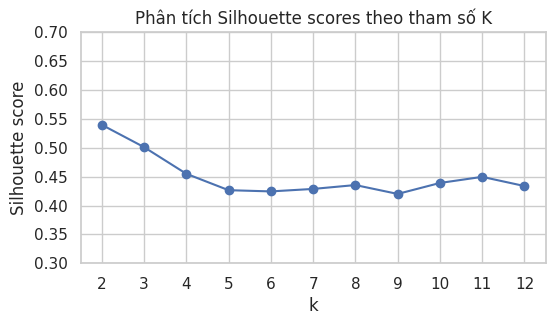

Giá trị tối ưu cho tham số: k = 2


In [ ]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 13) # Lưu ý: (k >= 2) vì cần tính khoảng cách từ xi đến nearest cluster
silhouettes = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(data[['Score', 'GDP']])
    silhouettes.append(silhouette_score(data[['Score', 'GDP']], model.fit_predict(data[['Score', 'GDP']]), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích Silhouette scores theo tham số K')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

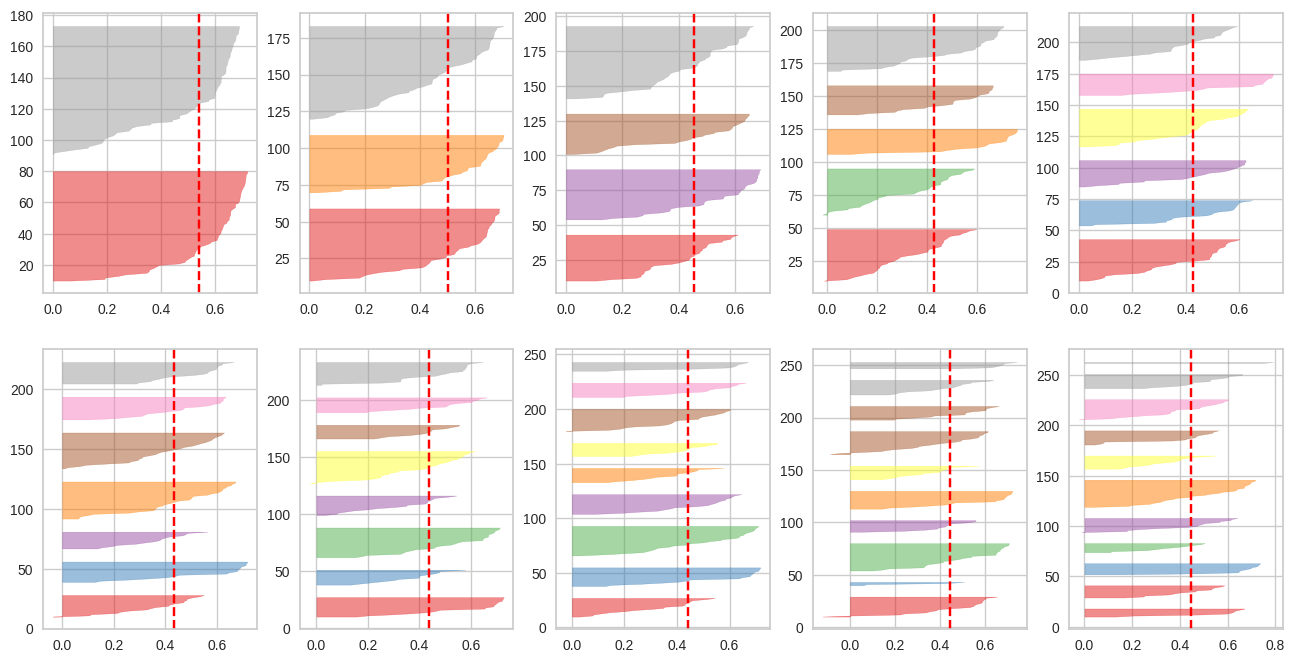

In [ ]:
## Biểu diễn trực quan Silhouette plot bằng thư viện YellowBrick
## https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
from yellowbrick.cluster import SilhouetteVisualizer

nbClusters = range(2, 12)
fig, ax = plt.subplots(2, 5, figsize = (16, 8)) # 2 rows, 5 cols

for k in nbClusters:
    model = KMeans(n_clusters = k)
    row, col = divmod(k - 2, 5) # tọa độ subplot

    visualizer = SilhouetteVisualizer(model, ax = ax[row][col])
    visualizer.fit(data[['Score', 'GDP']])
## Vạch đứng đứt nét thể hiện Silouette trung bình
## Mỗi data point xi sẽ có score là vạch nằm ngang
## Những clusters có shape nhọn phía bên phải là không tốt

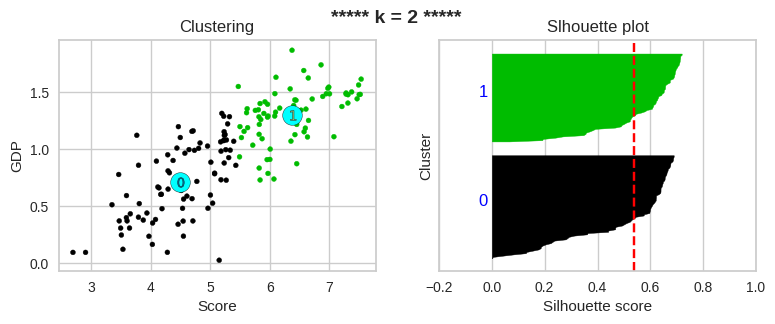

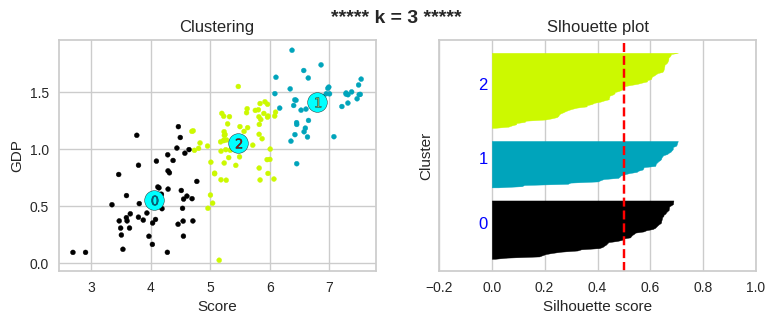

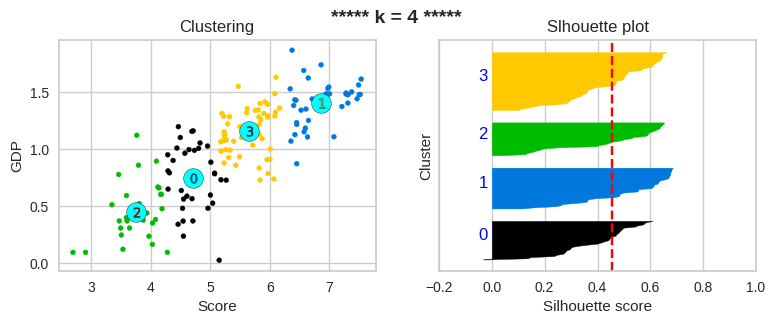

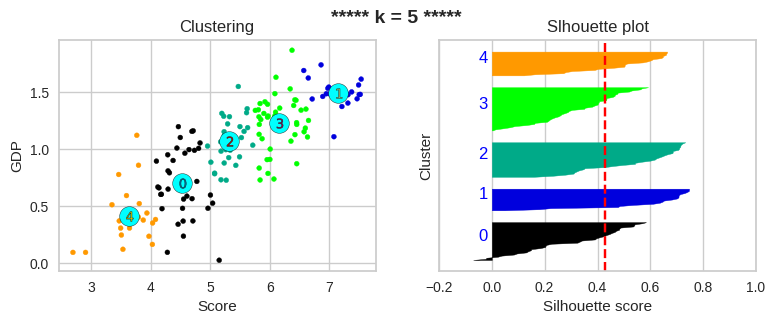

In [ ]:
## Biểu diễn trực quan clustering và phân tích silhouette scores theo tham số k
nbClusters = range(2, 6)
xmin       = min(silhouettes) # kết quả nhận được từ phía trên

for k in nbClusters:
    # Thực hiện kMeans với tham số k
    model  = KMeans(n_clusters = k)
    model.fit(data[['Score', 'GDP']])
    labels = model.fit_predict(data[['Score', 'GDP']]) # nhãn của clusters
    # Gán nhãn cluster vào DataFrame
    data['Cluster'] = labels
    # Biểu diễn trực quan
    fig, (ax1, ax2) = plt.subplots(1, 2) # ax1: scatter plot; ax2: Silhouette plot
    fig.set_size_inches(9, 3)

    ax1.set_title('Clustering')
    ax1.set_xlabel('Score')
    ax1.set_ylabel('GDP')
    colors = plt.cm.nipy_spectral(labels.astype(float) / k) # phổ mầu cho clusters
    ax1.scatter(data.Score, data.GDP, marker = '.', c = colors)

    # Các trọng tâm
    centroids = model.cluster_centers_
    ax1.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'o', c = 'cyan', alpha = 1, s = 200, edgecolor = 'k')
    for i, center in enumerate(centroids):
        ax1.scatter(center[0], center[1],
                    marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

    # Silhouette trung bình cho tất cả samples
    silhouette_avg = silhouette_score(data[['Score', 'GDP']], labels)

    # Silhouette scores cho mỗi sample (data point) xi
    silhouettes_samples = silhouette_samples(data[['Score', 'GDP']], labels)

    # Silhouette plot
    ax2.set_xlim([xmin, 1])
    ax2.set_ylim([0, len(data) + (k + 1) * 10])
    ax2.set_title('Slhouette plot')
    ax2.set_xlabel('Silhouette score')
    ax2.set_ylabel('Cluster')

    # Vạch đứng đứt nét thể hiện Silouette trung bình
    ax2.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax2.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_yticks([])  # Xóa ticks trên trục tung

    # Vẽ silhouette scores cho từng cluster Ci
    y_lower = 10 # tung độ bắt đầu vẽ
    for Ci in range(k):
        # Silhouette scores của các samples trong cluster Ci (sắp xếp giảm dần)
        silhouette_Ci = silhouettes_samples[labels == Ci]
        silhouette_Ci.sort()

        size_Ci = silhouette_Ci.shape[0]
        y_upper = y_lower + size_Ci # tung độ kết thúc của Ci

        # Vẽ các đường ngang thể hiện silhouette scores của Ci
        color = cm.nipy_spectral(float(Ci) / k) # phổ mầu
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, silhouette_Ci,
                          facecolor = color, edgecolor = color)

        # Hiện label của cluster Ci ở phía bên trái
        ax2.text(-0.05, y_lower + 0.5 * size_Ci, str(Ci), color = 'blue')
        plt.suptitle(f'***** k = {k} *****', fontsize = 14, fontweight = 'bold')

        # Tung độ cho cluster kế tiếp
        y_lower = y_upper + 10  # 10 là độ cách

plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

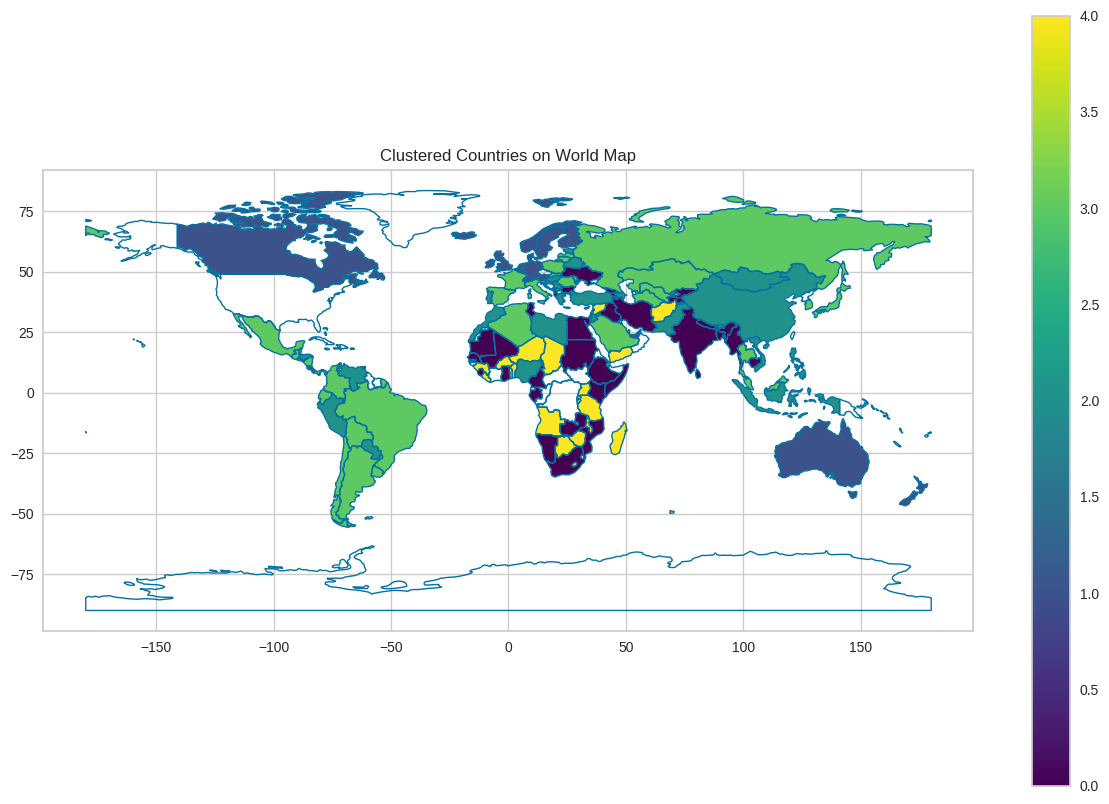

In [ ]:
# Đọc dữ liệu bản đồ thế giới (đảm bảo cài đặt geopandas và dữ liệu bản đồ thế giới)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Merge dữ liệu bản đồ và dữ liệu cluster
world = world.merge(data, how='left', left_on='name', right_on='Country')

# Vẽ biểu đồ bản đồ với màu sắc phân cụm
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world[world['Cluster'].notnull()].plot(column='Cluster', ax=ax, legend=True, cmap='viridis')
plt.title('Clustered Countries on World Map')
plt.show()

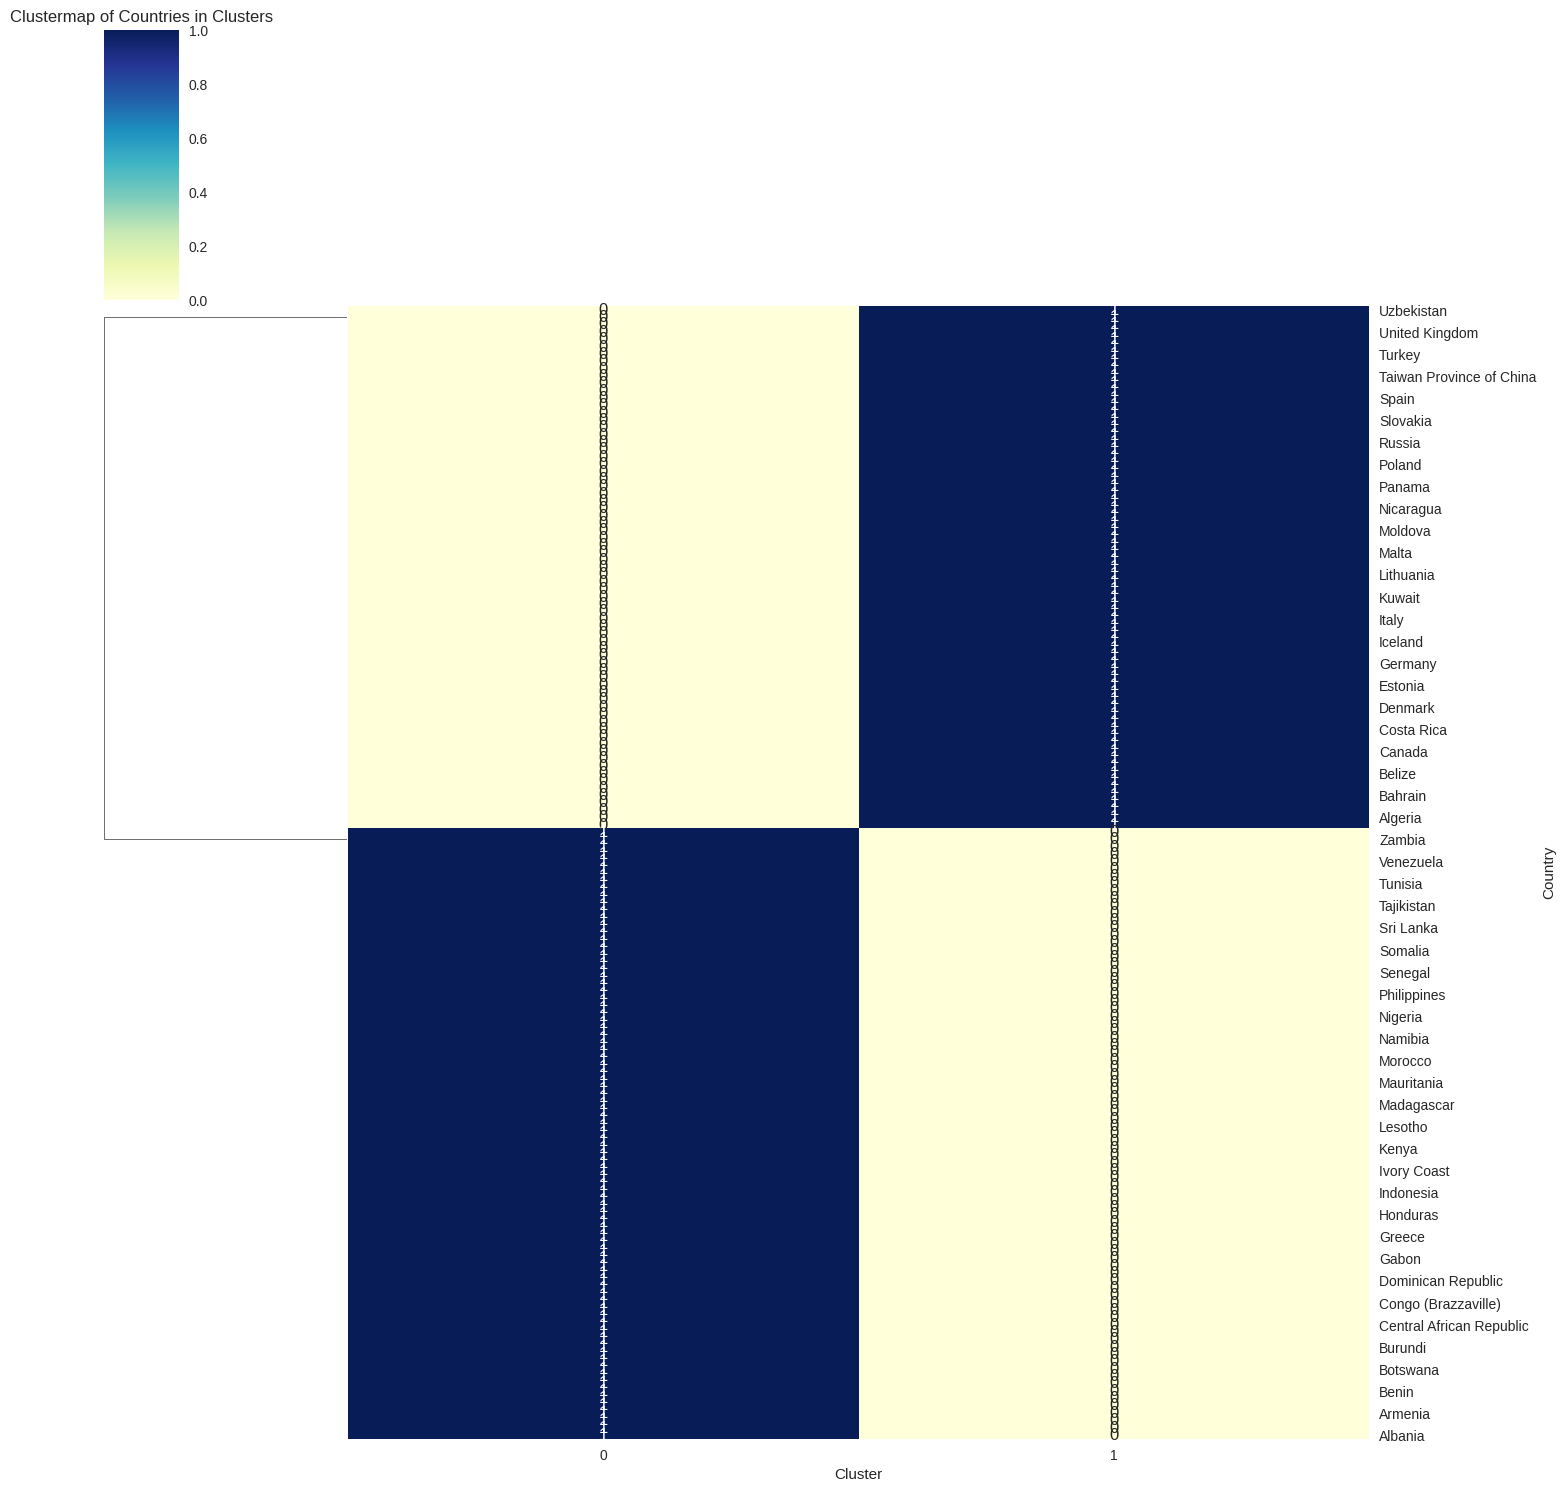

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# (Đoạn mã khác giữ nguyên)
# ...
# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Score', 'GDP']])
# Tạo DataFrame mới chỉ chứa thông tin cần thiết
clustered_df = data[['Country', 'Cluster']]

# Tạo bảng chéo giữa Country và Cluster
cross_tab = pd.crosstab(clustered_df['Country'], clustered_df['Cluster'])

# Vẽ biểu đồ clustermap
sns.clustermap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', col_cluster=False, figsize=(15, 15))
plt.title('Clustermap of Countries in Clusters')
plt.show()


In [ ]:
data

Score       GDP                   Country  Cluster
0    7.537  1.616463                    Norway        1
1    7.522  1.482383                   Denmark        1
2    7.504  1.480633                   Iceland        1
3    7.494  1.564980               Switzerland        1
4    7.469  1.443572                   Finland        1
..     ...       ...                       ...      ...
150  3.471  0.368746                    Rwanda        0
151  3.462  0.777153                     Syria        0
152  3.349  0.511136                  Tanzania        0
153  2.905  0.091623                   Burundi        0
154  2.693  0.091623  Central African Republic        0

[154 rows x 4 columns]

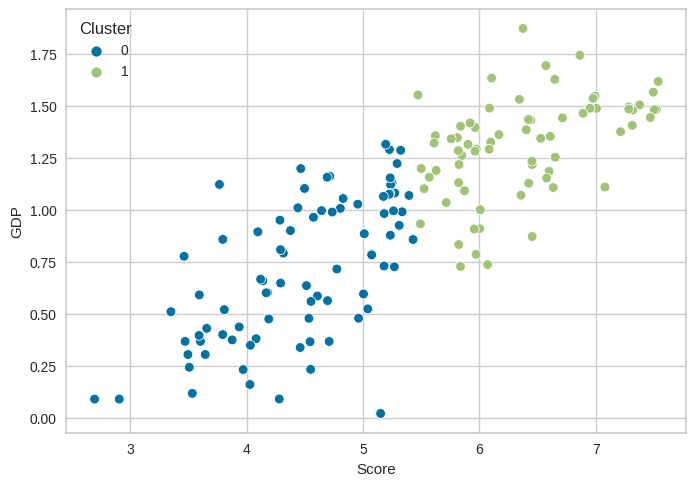

In [ ]:
sns.scatterplot(x = 'Score', y = 'GDP', data = data, hue = 'Cluster')
plt.show()

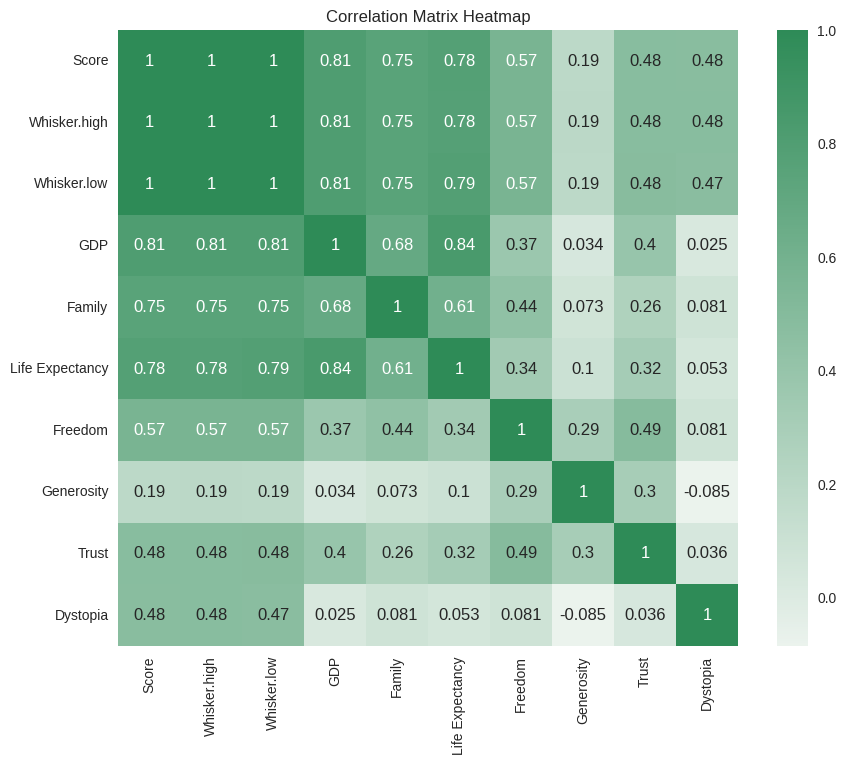

In [ ]:
correlation_matrix = df.iloc[:, 2:12].corr()

# Set a custom color palette (salmon)
custom_palette = sns.light_palette("seagreen", as_cmap=True)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Import thư viện

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Chuẩn bị dữ liệu


In [ ]:
df.Country

0                        Norway
1                       Denmark
2                       Iceland
3                   Switzerland
4                       Finland
                 ...           
150                      Rwanda
151                       Syria
152                    Tanzania
153                     Burundi
154    Central African Republic
Name: Country, Length: 154, dtype: object

In [ ]:
df.columns

Index(['Country', 'Rank', 'Score', 'Whisker.high', 'Whisker.low', 'GDP',
       'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust',
       'Dystopia', 'Tier', 'Continent', 'CI Width', 'Top Feature'],
      dtype='object')

In [ ]:
# Chia dữ liệu thành biến phụ thuộc (Y) và biến độc lập (X)
Y = df['Score']
X = df[['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust','Dystopia']]

X = sm.add_constant(X)  # Thêm hệ số chặn (intercept) vào mô hình

## Tạo và huấn luyện mô hình hồi quy tuyến tính bội

In [ ]:
model = sm.OLS(Y, X).fit()

## In kết quả của mô hình

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4129.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          2.20e-164
Time:                        03:26:12   Log-Likelihood:                 170.07
No. Observations:                 154   AIC:                            -324.1
Df Residuals:                     146   BIC:                            -299.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.040     

### Calculate confidence intervals of regression coefficients

In [ ]:
confidence_intervals = model.conf_int()
confidence_intervals #0 Lower Limit 1 Upper Limit

0         1
const           -0.076438  0.080726
GDP              0.846079  0.980501
Family           0.955621  1.093722
Life Expectancy  1.020718  1.232727
Freedom          0.999279  1.225289
Generosity       0.813010  1.044764
Trust            0.899581  1.232819
Dystopia         0.943147  0.996439

## Phương trình hồi quy tuyến tính bội

In [ ]:
# Lấy các hệ số từ mô hình
const = model.params['const']
coef_gdp = model.params['GDP']
coef_family = model.params['Family']
coef_life_expectancy = model.params['Life Expectancy']
coef_freedom = model.params['Freedom']
coef_generosity = model.params['Generosity']
coef_trust = model.params['Trust']
coef_dystopia = model.params['Dystopia']

# In phương trình hồi quy tuyến tính bội
equation = f"Score = {const:.4f} + {coef_gdp:.4f} * GDP + {coef_family:.4f} * Family + {coef_life_expectancy:.4f} * Life Expectancy + {coef_freedom:.4f} * Freedom + {coef_generosity:.4f} * Generosity + {coef_trust:.4f} * Trust + {coef_dystopia:.4f}*Dystopia"
print(equation)

Score = 0.0021 + 0.9133 * GDP + 1.0247 * Family + 1.1267 * Life Expectancy + 1.1123 * Freedom + 0.9289 * Generosity + 1.0662 * Trust + 0.9698*Dystopia


Trong phương trình này:

- Intercept (hệ số chặn) là 1.6323 (const).
- Hệ số của biến GDP là 0.7315.
- Hệ số của biến Family là 1.1732.
- Hệ số của biến Life Expectancy là 1.3638.
- Hệ số của biến Freedom là 1.3600.
- Hệ số của biến Generosity là 0.4176.
- Hệ số của biến Trust là 1.6598.
- Hệ số của biến Dystopia là 0.9630.

Đây là phương trình hồi quy tuyến tính bội mà bạn có thể sử dụng để dự đoán giá trị của biến phụ thuộc (Score) dựa trên giá trị của các biến độc lập (GDP, Family, Life Expectancy, Freedom, Generosity, Trust, Dystopia).

In [ ]:
# Lấy giá trị R-squared
r2 = model.rsquared
print(f"R-squared: {r2:.3f}")

R-squared: 0.995


Trong kết quả mô hình của bạn, R-squared (R²) được hiển thị là 0.819. Điều này có nghĩa là mô hình của bạn có khả năng giải thích khoảng 81.9% phương sai trong biến phụ thuộc (Score) bằng các biến độc lập (GDP, Family, Life Expectancy, Freedom, Generosity, Trust). Điều này có thể được xem như mô hình của bạn giải thích một phần lớn biến động của biến phụ thuộc dựa trên các biến độc lập đã chọn.
Đánh giá mô hình hồi quy tuyến tính bội: R-squared (R²).

1. **R-squared (R²)**: Giá trị R-squared là 0.819. R-squared cho biết mức độ mô hình có thể giải thích biến động của biến phụ thuộc bằng các biến độc lập. Giá trị R² càng gần 1, mô hình càng tốt. Trong trường hợp này, R² = 0.819 có nghĩa là mô hình của bạn giải thích được khoảng 81.9% sự biến động trong biến phụ thuộc bằng các biến độc lập. Điều này cho thấy mô hình có hiệu suất tương đối tốt.

Dựa trên R², mô hình hồi quy tuyến tính bội có vẻ khá tốt trong việc dự đoán biến phụ thuộc dựa trên các biến độc lập đã sử dụng.

###Calculate the standardized residuals

In [ ]:
standardized_residuals = model.get_influence().resid_studentized_internal
standardized_residuals

array([ 1.75404008e-02, -1.73636002e-01,  5.70619301e-02, -2.18062857e-01,
       -2.71274924e-01,  1.08087564e-01, -8.88581588e-02, -2.37718251e-01,
       -2.18937658e-01, -1.09471290e-01,  4.19572728e-01, -7.70042472e-02,
       -4.90547426e-02,  3.51762429e-01, -1.24995783e-01, -8.68380908e-02,
       -1.42626142e-01, -1.61084602e-01, -5.21082784e-02,  2.78731652e-01,
        4.71574331e-02,  2.32094901e-01,  8.84706567e-02,  5.77780583e-02,
        2.17056831e-01, -5.19044585e-01, -1.87847367e-01, -2.61699843e-01,
        2.12516785e-01, -2.29586970e-03, -1.63889974e-01,  1.67787301e-01,
        3.04741906e-01, -1.41018286e-01,  3.93461905e-03,  1.67333208e-01,
        3.57878782e-01,  5.36941127e-01,  3.00466172e-01,  2.97433326e-01,
       -4.62064453e-02,  5.06957321e-01, -1.82525318e-01, -1.83589006e-01,
        6.05652383e-02, -1.35790419e-01, -5.20321760e-01,  1.45759823e-01,
        3.67065753e-01,  2.71507357e-01, -6.00051060e-01,  4.62354185e-01,
        4.04092065e-01,  

##Scatter plot of the standardized residuals with std limits

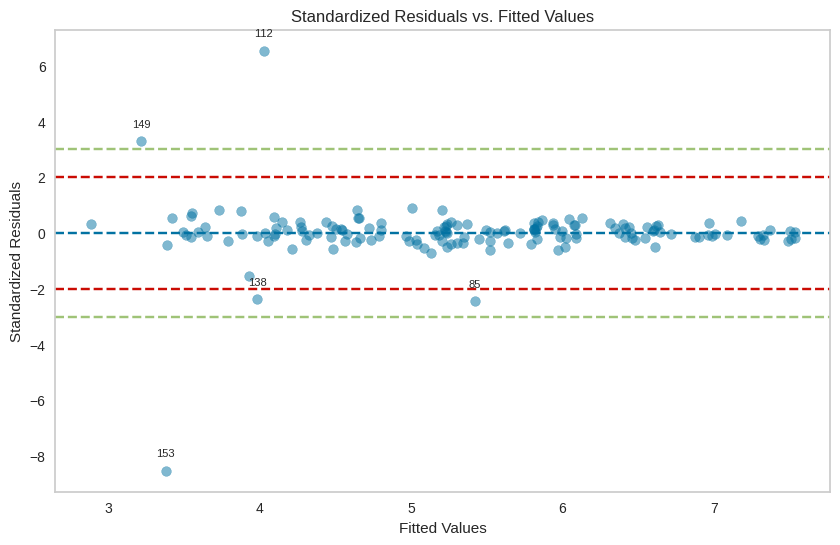

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, standardized_residuals, alpha=0.5)
plt.axhline(y=2, color='r', linestyle='--', label='Upper Bound (+2 std)')
plt.axhline(y=-2, color='r', linestyle='--', label='Lower Bound (-2 std)')
plt.axhline(y=3, color='g', linestyle='--', label='Upper Bound (+3 std)')
plt.axhline(y=-3, color='g', linestyle='--', label='Lower Bound (-3 std)')
plt.axhline(y=0, color='b', linestyle='--', label='Zero')
# Add index numbers near the lines
for i, (x, y) in enumerate(zip(model.fittedvalues, standardized_residuals)):
    if abs(y) >= 2:
        plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs. Fitted Values')
plt.grid()
plt.show()

### Breusch-Pagan test for heteroskedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Round the results to 4 decimal places
bp_lm_statistic = round(bp_test[0], 4)
bp_p_value = round(bp_test[1], 4)

# Print the results
print("Breusch-Pagan Test:")
print("LM Statistic:", bp_lm_statistic)
print("p-value:", bp_p_value)

# Interpret the results
alpha = 0.05  # Significance level
if bp_p_value > alpha:
    print("There is no evidence of heteroskedasticity (fail to reject H0)")
else:
    print("There is evidence of heteroskedasticity (reject H0)")

Breusch-Pagan Test:
LM Statistic: 9.1883
p-value: 0.2394
There is no evidence of heteroskedasticity (fail to reject H0)


Shapiro-Wilk test for Normality

In [ ]:
from scipy.stats import shapiro
shapiro_stat, shapiro_pvalue = shapiro(standardized_residuals)

# Round the results to 4 decimal places
shapiro_stat = round(shapiro_stat, 4)
shapiro_pvalue = round(shapiro_pvalue, 4)

# Print the results
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_stat)
print("p-value:", shapiro_pvalue)

# Interpret the results
alpha = 0.05  # Significance level
if shapiro_pvalue > alpha:
    print("The residuals appear to be normally distributed (fail to reject H0)")
else:
    print("The residuals do not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test:
Test Statistic: 0.4782
p-value: 0.0
The residuals do not appear to be normally distributed (reject H0)


## Kiểm tra giả định phân phối chuẩn của phần dư:

### Biểu đồ tần số phần dư chuẩn hóa **Histogram**

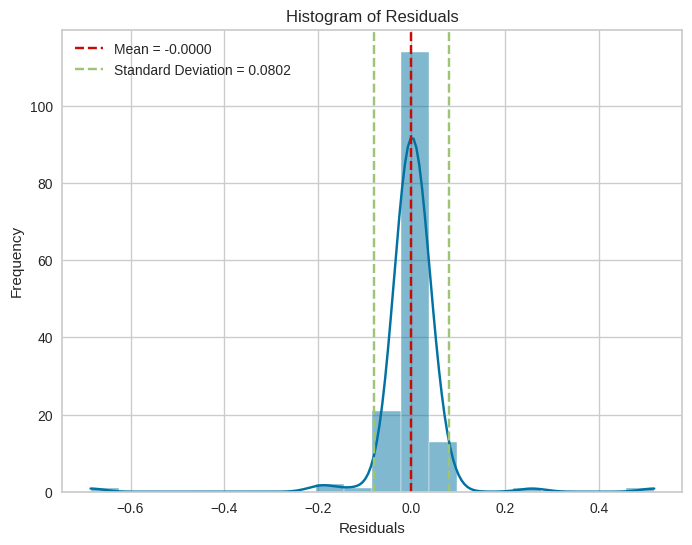

In [ ]:
# Lấy phần dư từ mô hình
residuals = model.resid

# Vẽ biểu đồ Histogram của phần dư
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)  # Vẽ Histogram với 20 khoảng
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Tính giá trị trung bình và độ lệch chuẩn
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

plt.axvline(x=mean_residuals, color='r', linestyle='--', label=f'Mean = {mean_residuals:.4f}')
plt.axvline(x=mean_residuals + std_residuals, color='g', linestyle='--', label=f'Standard Deviation = {std_residuals:.4f}')
plt.axvline(x=mean_residuals - std_residuals, color='g', linestyle='--')
plt.legend()

plt.show()

In [ ]:
print(f'Mean = {mean_residuals}')
print(f'Standard Deviation = {std_residuals}')

Mean = -1.5571959306430767e-15
Standard Deviation = 0.0801929368983718


Dựa vào giá trị Mean và Standard Deviation có thể đánh giá như sau:

1. Giá trị Mean gần bằng 0 (cụ thể là 8.3546e-15), cho thấy trung bình của phần dư gần với 0. Điều này là một dấu hiệu tích cực, vì trong giả định chuẩn, Mean của phần dư sẽ xấp xỉ 0.

2. Giá trị Standard Deviation là 0.4800, có sự biến động nhất định trong phần dư, nhưng nó không quá lớn. Standard Deviation xấp xỉ 1 (trong trường hợp này, nó gần bằng 0.48), cho thấy sự phân phối của phần dư không có độ lệch lớn so với một phân phối chuẩn. Điều này cũng là một dấu hiệu tích cực về việc giả định về phân phối chuẩn không bị vi phạm.

Dựa vào giá trị Mean và Standard Deviation trên biểu đồ Histogram của phần dư, có thể kết luận rằng giả định về phân phối chuẩn của phần dư trong mô hình hồi quy tuyến tính không bị vi phạm.

### Biểu đồ phần dư chuẩn hóa Normal P-P Plot

In [ ]:
residuals

0      0.001412
1     -0.013812
2      0.004568
3     -0.017465
4     -0.021563
         ...   
150    0.257868
151    0.040127
152   -0.034007
153    0.024596
154   -0.685367
Length: 154, dtype: float64

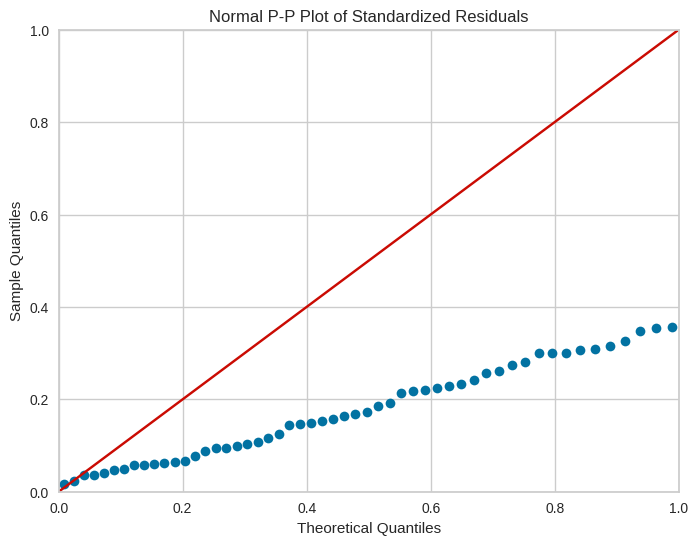

In [ ]:
# Sử dụng hàm qqplot của statsmodels
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='45', ax=ax, fit=True)
ax.set_title('Normal P-P Plot of Standardized Residuals')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Qua quan sát thì các điểm phân vị trong phân phối của phần dư tập trung thành một đường chéo, từ đó suy ra giả định phân phối chuẩn của phần dư không bị vi phạm.

### Biểu đồ Scatter Plot kiểm tra giả định liên hệ tuyến tính

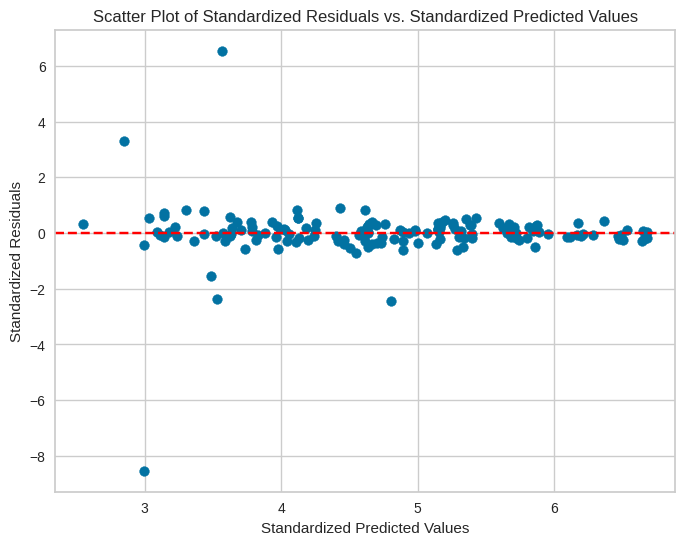

In [ ]:
# Lấy phần dư chuẩn hóa từ mô hình
standardized_residuals = model.get_influence().resid_studentized_internal

# Lấy giá trị dự đoán chuẩn hóa từ mô hình
standardized_predicted_values = model.fittedvalues / np.std(model.fittedvalues)

# Vẽ biểu đồ Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(standardized_predicted_values, standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Scatter Plot of Standardized Residuals vs. Standardized Predicted Values")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residuals")
plt.show()

Leverage and Cook's distance


In [ ]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Calculate the leverage threshold
leverage_threshold = round(2 * leverage.mean(), 4)

# Calculate the Cook's distance threshold
cook_threshold = round(4 / len(df), 4)

# Find the indexes of observations with high leverage
high_leverage_indexes = [i for i, lev in enumerate(leverage) if lev > leverage_threshold]

# Find the indexes of observations with high Cook's distance
high_cooks_indexes = [i for i, cook in enumerate(cooks_d) if cook > cook_threshold]

# Print the leverage threshold and Cook's distance threshold
print("Leverage Threshold:", leverage_threshold)
print("Cook's Distance Threshold:", cook_threshold)

Leverage Threshold: 0.1039
Cook's Distance Threshold: 0.026


In [ ]:
print("Values of Observations with Higher than Leverage:")
for i in high_leverage_indexes:
    print(f"Observation {i} - Leverage: {leverage[i]:.4f}")

print("\nValues of Observations with Higher than Cook's Distance:")
for i in high_cooks_indexes:
    print(f"Observation {i} - Cook's Distance: {cooks_d[i]:.4f}")

Values of Observations with Higher than Leverage:
Observation 25 - Leverage: 0.1104
Observation 34 - Leverage: 0.1290
Observation 79 - Leverage: 0.1056
Observation 91 - Leverage: 0.1459
Observation 123 - Leverage: 0.1218
Observation 140 - Leverage: 0.1113
Observation 143 - Leverage: 0.1119
Observation 150 - Leverage: 0.1594

Values of Observations with Higher than Cook's Distance:
Observation 85 - Cook's Distance: 0.0503
Observation 112 - Cook's Distance: 0.4217
Observation 138 - Cook's Distance: 0.0747
Observation 149 - Cook's Distance: 0.1497
Observation 153 - Cook's Distance: 0.4726


Plot Leverage Values

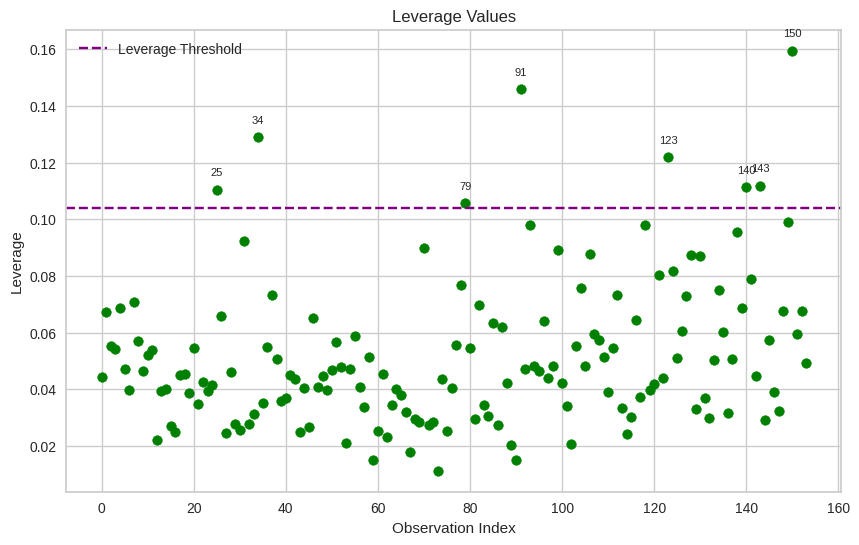

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(leverage)), leverage, color='green', marker='o')
plt.axhline(y=leverage_threshold, color='purple', linestyle='--', label="Leverage Threshold")
plt.title('Leverage Values')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()

# Add index annotations
for i, lev in enumerate(leverage):
    if lev > leverage_threshold:
        plt.annotate(f"{i}", (i, lev), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.show()

Plot Cook's Distance Values

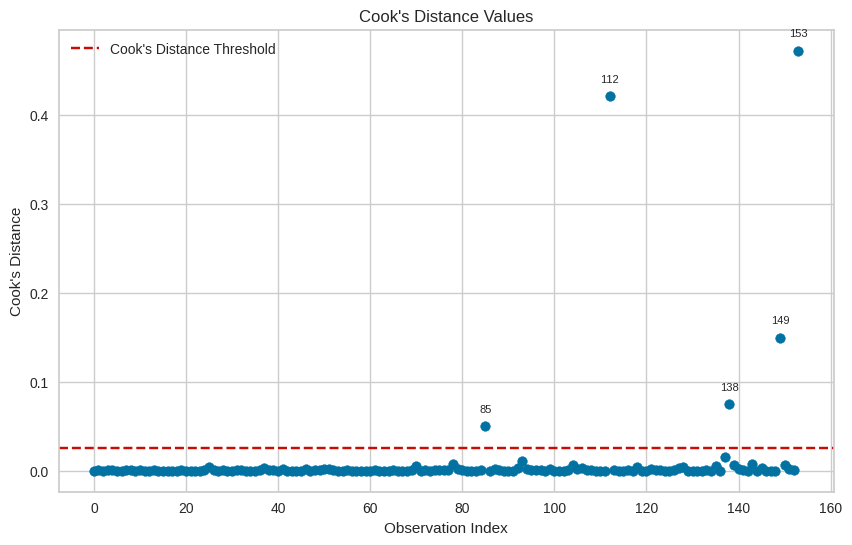

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cooks_d)), cooks_d)
plt.axhline(y=cook_threshold, color='r', linestyle='--', label='Cook\'s Distance Threshold')
plt.title('Cook\'s Distance Values')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.legend()

# Add index annotations
for i, cook in enumerate(cooks_d):
    if cook > cook_threshold:
        plt.annotate(f"{i}", (i, cook), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.show()

Calculate VIF for each predictor variable

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

          Variable        VIF
0            const  35.892289
1              GDP   4.619590
2           Family   2.087801
3  Life Expectancy   3.619547
4          Freedom   1.590729
5       Generosity   1.206665
6            Trust   1.537830
7         Dystopia   1.031124


Phần dư chuẩn hóa phân bổ ngẫu nhiên tập trung xung quanh đường tung độ 0 và trãi dài, do đó có thể khẳng định giả định quan hệ tuyến tính giữa biến phụ thuộc với các biến độc lập không bị vi phạm.

# 5. KIỂM ĐỊNH GIẢ THUYẾT

## 5.1 Kiểm định t (t-test): Kiểm định giá trị trung bình của biến `Score` là lớn hơn hoặc bằng 5

Giả sử chúng ta muốn kiểm định giả thuyết rằng giá trị trung bình của `Score` lớn hơn hoặc bằng 5, với độ tin cậy là 99%; nghĩa là, chúng ta sẽ bác bỏ giả thuyết $H_0$ và ủng hộ giả thuyết thay thế $H_1$ nếu p-value < 0,01.

$H_0$: $μ_{Score} <= 5$

$H_1$: $μ_{Score} > 5$

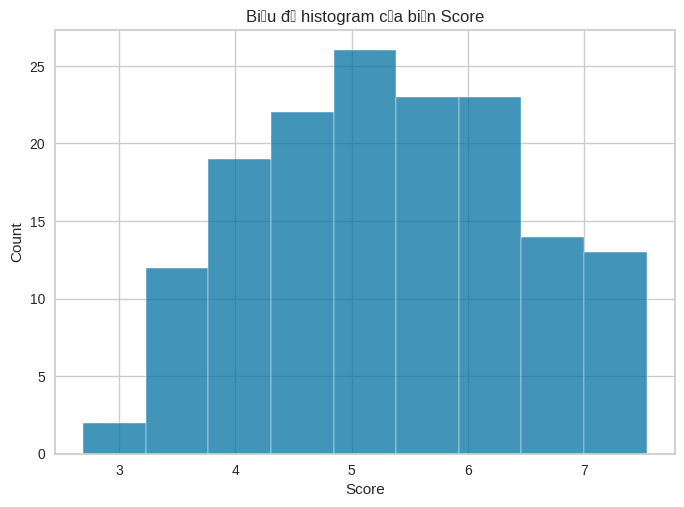

In [ ]:
sns.histplot(df['Score'])
plt.title('Biểu đồ histogram của biến Score');

In [ ]:
import numpy as np
from scipy import stats

alpha = 0.01
p_value = stats.ttest_1samp(df['Score'].values, popmean=5, alternative='greater').pvalue

if p_value < alpha:
    print(f"Vì p-value = {p_value:.4f} < alpha = {alpha} nên BÁC BỎ H0 ==> Giá trị trung bình của biến Score lớn hơn 5")
else:
    print(f"Vì p-value = {p_value} > alpha = {alpha} nên KHÔNG BÁC BỎ H0 ==> Giá trị trung bình của biến Score nhỏ hơn hoặc bằng 5")

Vì p-value = 0.0001 < alpha = 0.01 nên BÁC BỎ H0 ==> Giá trị trung bình của biến Score lớn hơn 5


## 5.2 Kiểm định Shapiro-Wilk

**Kiểm định Shapiro-Wilk** (Shapiro-Wilk Test) là một phương pháp kiểm định thống kê được sử dụng để xác định xem một tập dữ liệu có tuân theo phân phối chuẩn (phân phối Gaussian) hay không.

$H_0$: Biến Score có dạng phân phối chuẩn

$H_1$: Biến Score không có dạng phân phối chuẩn

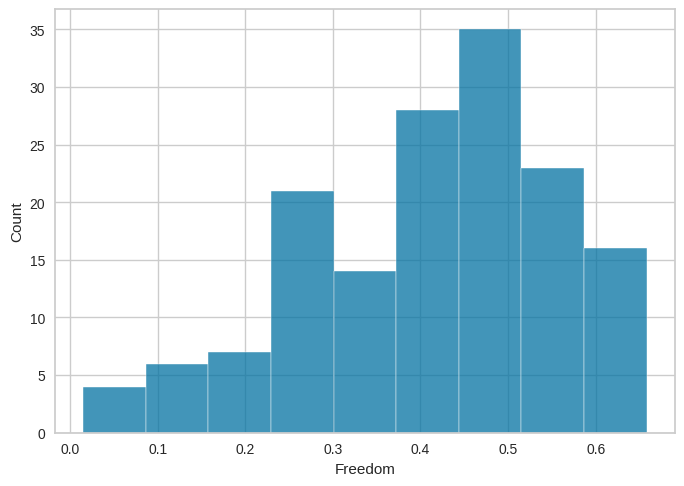

In [ ]:
sns.histplot(df['Freedom']);

In [ ]:
from scipy import stats
x = df['Freedom'].values
res = stats.shapiro(x)
res

ShapiroResult(statistic=0.9619408845901489, pvalue=0.0003025261976290494)

Việc kiểm định được thực hiện bằng cách so sánh giá trị thống kê với phân phối được hình thành theo giả thuyết không với các trọng số lấy từ phân phối chuẩn. Đối với kiểm định phân phối chuẩn này, phân phối của giả thuyết không (null hypothesis) không dễ tính toán chính xác, do đó nó thường được xấp xỉ bằng phương pháp Monte Carlo, nghĩa là lấy nhiều mẫu có cùng kích thước với x từ phân phối chuẩn và tính toán các giá trị của thống kê cho mỗi mẫu.

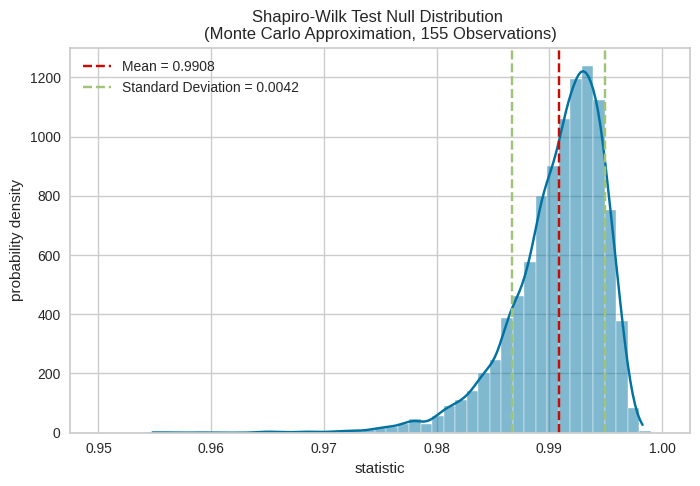

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic
ref = stats.monte_carlo_test(x, stats.norm.rvs, statistic, alternative='less')

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0.95, 1, 50)
def plot(ax):  # we'll re-use this
    # Plot histogram and calculate mean and standard deviation
    sns.histplot(ref.null_distribution, kde=True, bins=bins)
    mean = np.mean(ref.null_distribution)
    std = np.std(ref.null_distribution)
    # Plot mean and std line
    plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean = {mean:.4f}')
    plt.axvline(x=mean + std, color='g', linestyle='--', label=f'Standard Deviation = {std:.4f}')
    plt.axvline(x=mean - std, color='g', linestyle='--')
    plt.legend()
    # Set title and labels
    ax.set_title("Shapiro-Wilk Test Null Distribution \n"
                 "(Monte Carlo Approximation, 155 Observations)")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

Nếu p-value “nhỏ” - nghĩa là, việc lấy mẫu dữ liệu từ một quần thể có phân bố chuẩn tạo ra giá trị thống kê lớn như vậy có xác suất vô cùng nhỏ - điều này có thể được coi là bằng chứng chống lại $H_0$ và ủng hộ giả thuyết thay thế $H_1$: các trọng số không được rút ra từ phân phối chuẩn.

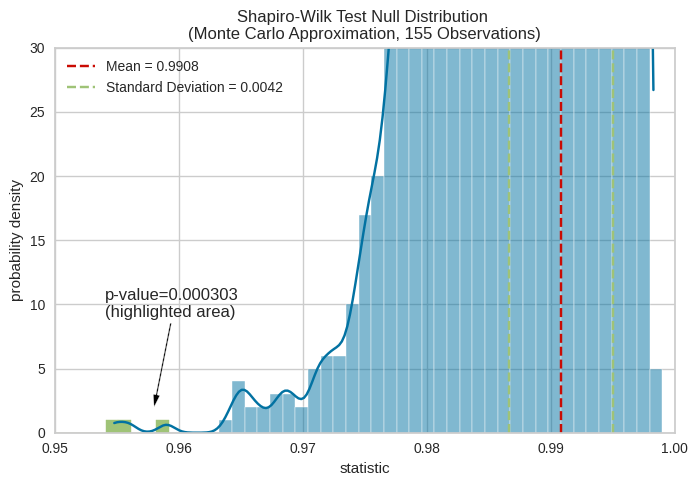

0.0003025261976290494

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
annotation = (f'p-value={res.pvalue:.6f}\n(highlighted area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=9)
ax.annotate(annotation, (0.958, 2), (0.954, 9), arrowprops=props)
i_extreme = np.where(bins <= res.statistic)[0]
for i in i_extreme:
    ax.patches[i].set_color('C1')
plt.xlim(0.95, 1)
plt.ylim(0, 30)
plt.show()
res.pvalue

## 5.3 Kiểm định Skewness

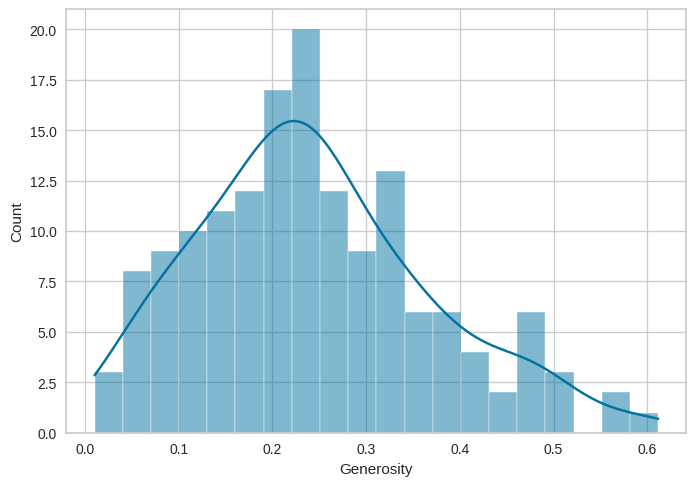

In [ ]:
sns.histplot(df['Generosity'], kde=True, bins=20);

In [ ]:
from scipy import stats
import numpy as np

x = df['Generosity'].values
res = stats.skewtest(x)
res.statistic

2.7411264954615726

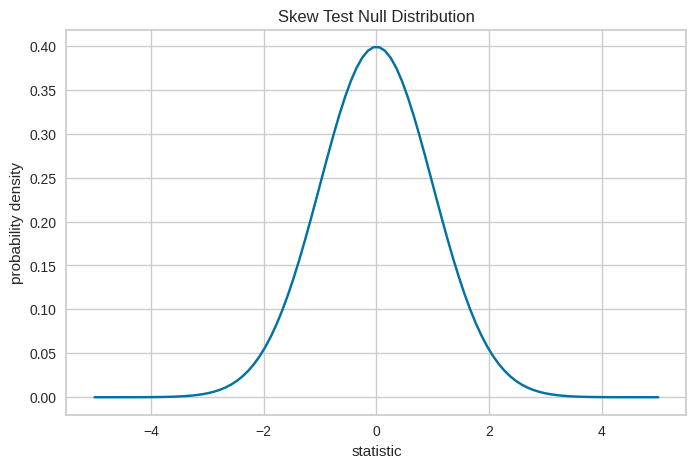

In [ ]:
import matplotlib.pyplot as plt
dist = stats.norm()
st_val = np.linspace(-5, 5, 100)
pdf = dist.pdf(st_val)
fig, ax = plt.subplots(figsize=(8, 5))
def st_plot(ax):  # we'll re-use this
    ax.plot(st_val, pdf)
    ax.set_title("Skew Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
st_plot(ax)
plt.show()

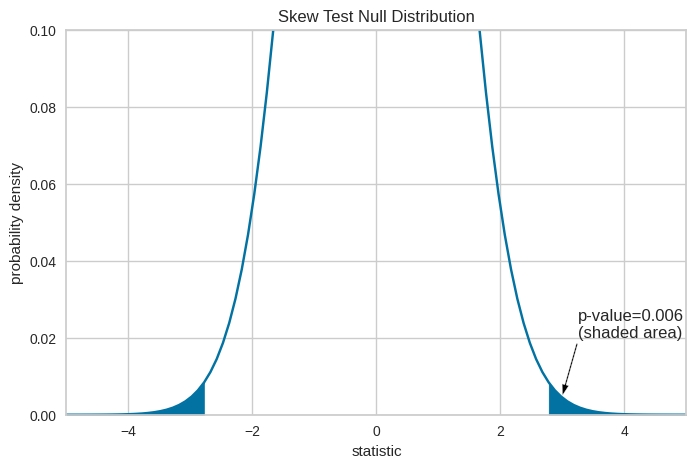

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
st_plot(ax)
pvalue = dist.cdf(-res.statistic) + dist.sf(res.statistic)
annotation = (f'p-value={pvalue:.3f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (3, 0.005), (3.25, 0.02), arrowprops=props)
i = st_val >= res.statistic
ax.fill_between(st_val[i], y1=0, y2=pdf[i], color='C0')
i = st_val <= -res.statistic
ax.fill_between(st_val[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

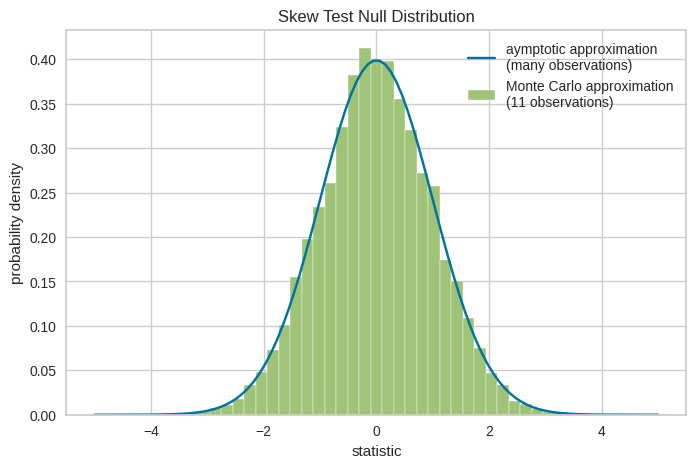

In [ ]:
def statistic(x, axis):
    # get just the skewtest statistic; ignore the p-value
    return stats.skewtest(x, axis=axis).statistic
res = stats.monte_carlo_test(x, stats.norm.rvs, statistic)
fig, ax = plt.subplots(figsize=(8, 5))
st_plot(ax)
ax.hist(res.null_distribution, np.linspace(-5, 5, 50),
        density=True)
ax.legend(['aymptotic approximation\n(many observations)',
           'Monte Carlo approximation\n(11 observations)'])
plt.show()

## 5.4 Kiểm định Skewness

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 154
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          154 non-null    object  
 1   Rank             154 non-null    int64   
 2   Score            154 non-null    float64 
 3   Whisker.high     154 non-null    float64 
 4   Whisker.low      154 non-null    float64 
 5   GDP              154 non-null    float64 
 6   Family           154 non-null    float64 
 7   Life Expectancy  154 non-null    float64 
 8   Freedom          154 non-null    float64 
 9   Generosity       154 non-null    float64 
 10  Trust            154 non-null    float64 
 11  Dystopia         154 non-null    float64 
 12  Tier             154 non-null    category
 13  Continent        154 non-null    object  
 14  CI Width         154 non-null    float64 
 15  Top Feature      154 non-null    object  
dtypes: category(1), float64(11), int64(1), objec

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'data' is your DataFrame and 'Country' is the categorical variable
# 'Happiness_Score' is the numerical variable of interest

# Example DataFrame columns: ['Country', 'Happiness_Score', ...other factors...]

# Perform ANOVA to check for significant differences
# ANOVA assumes 'Happiness_Score' is normally distributed within each group
# Replace 'data' and 'Happiness_Score' with your actual DataFrame and column name
# from statsmodels.formula.api import ols
# model = ols('Tier ~ Country', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# Perform Tukey's HSD test for multiple comparisons
# Replace 'Happiness_Score' and 'Country' with your column names
tukey_results = pairwise_tukeyhsd(df['Score'], df['Continent'])
print(tukey_results.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
       Africa          Asia   1.0644    0.0  0.5641 1.5646   True
       Africa        Europe    1.899    0.0  1.3801 2.4179   True
       Africa North America   1.7887    0.0  1.0647 2.5127   True
       Africa       Oceania   3.0595    0.0  1.3537 4.7653   True
       Africa South America   1.8591    0.0  1.0325 2.6857   True
         Asia        Europe   0.8347 0.0001  0.3185 1.3509   True
         Asia North America   0.7243 0.0488  0.0023 1.4464   True
         Asia       Oceania   1.9951 0.0118  0.2901 3.7002   True
         Asia South America   0.7947  0.066 -0.0301 1.6196  False
       Europe North America  -0.1103  0.998 -0.8454 0.6248  False
       Europe       Oceania   1.1605 0.3711 -0.5501 2.8711  False
       Europe South America  -0.0399    1.0 -0.8762 0.7964  False
North Amer